Goal: Goal: Train and test a Random Forest Regression model using features: Bednights, Region, HHSize, HHEmployed, HHTANF, and slotted along with group: FamilyID to be able to predict bednights. Evaluate and iterate model. Second attempt at modeling after Linear Regression.

In [1]:
##Load Modules for Roandom Forest Regression Analysis training and testing
import pandas as pd
from sklearn.model_selection import GridSearchCV, GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [2]:
##Load data, already processed to show no duplicates and no NaN in Linear Model, won't be repeated here
##Forest Regressor handles one-hot encoding natively, won't repeat pd.get_dummies here.
## descriptive statistics handled previously in Linear Regression. .describe() not repeated here.
forest1 = pd.read_csv("C:/Users/morel/Downloads/Training Data 7-8-2025.csv")
forest1['HHSize_bin'] = pd.cut(forest1['HHSize'], bins=[0,4,10], labels=['small','big'])
print(forest1.head(5))

   FamilyID  ResidentID  Bednights  RegionCode  HHSize  HHEmployed  HHTANF  \
0       243         957        957           1       4           1       0   
1       243         958        957           1       4           1       0   
2       243         959        957           1       4           1       0   
3       243         960        957           1       4           1       0   
4       242         973        944           1       3           1       0   

   Slotted  SlottedCCM  SlottedPME  Destination  SingleMom  SingleDad  \
0        0           0           0            6          1          0   
1        0           0           0            6          1          0   
2        0           0           0            6          1          0   
3        0           0           0            6          1          0   
4        1           1           0            4          0          0   

   SingleParent  Disability HHSize_bin  
0             1           0      small  
1         

In [3]:
##Forest Regression: predict bednights. expand categorical column
forest_encoded = pd.get_dummies(forest1, columns=['RegionCode','Destination','HHSize_bin'], dtype=int)
x = forest_encoded.drop(columns=['Bednights','FamilyID','ResidentID','Destination_1']) 
y = forest_encoded['Bednights']                                       
groups = forest_encoded['FamilyID']
print(forest_encoded.head())

   FamilyID  ResidentID  Bednights  HHSize  HHEmployed  HHTANF  Slotted  \
0       243         957        957       4           1       0        0   
1       243         958        957       4           1       0        0   
2       243         959        957       4           1       0        0   
3       243         960        957       4           1       0        0   
4       242         973        944       3           1       0        1   

   SlottedCCM  SlottedPME  SingleMom  ...  Destination_4  Destination_5  \
0           0           0          1  ...              0              0   
1           0           0          1  ...              0              0   
2           0           0          1  ...              0              0   
3           0           0          1  ...              0              0   
4           1           0          0  ...              1              0   

   Destination_6  Destination_7  Destination_8  Destination_9  Destination_10  \
0              1 

HHSize: 0.1143
HHEmployed: 0.2595
HHTANF: 0.0243
Slotted: 0.0141
SlottedCCM: 0.0117
SlottedPME: 0.0120
SingleMom: 0.0256
SingleDad: 0.0505
SingleParent: 0.0185
Disability: 0.0000
RegionCode_1: 0.0177
RegionCode_2: 0.0159
RegionCode_3: 0.0036
RegionCode_4: 0.0159
RegionCode_5: 0.0000
Destination_2: 0.0004
Destination_3: 0.1559
Destination_4: 0.0438
Destination_5: 0.0181
Destination_6: 0.0472
Destination_7: 0.0247
Destination_8: 0.0114
Destination_9: 0.0079
Destination_10: 0.0281
Destination_11: 0.0261
HHSize_bin_small: 0.0260
HHSize_bin_big: 0.0268


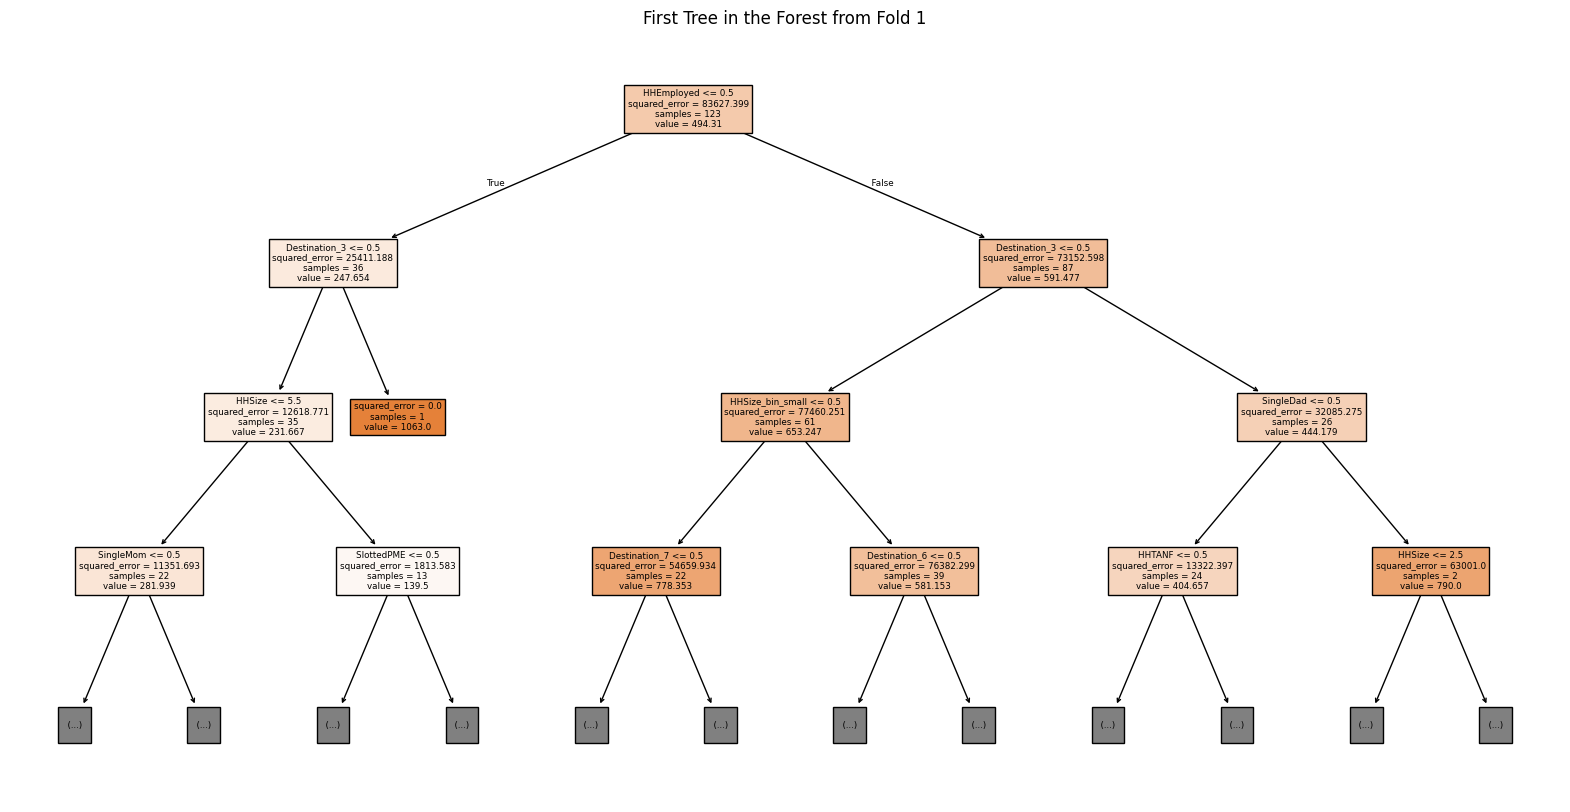

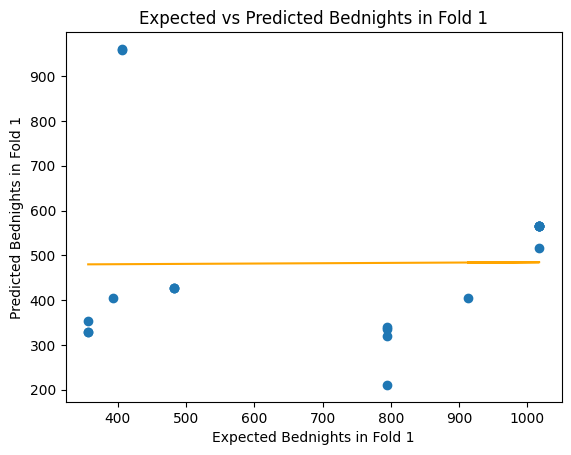

Fold 1 - MSE: 159162.9575, RMSE: 398.9523, R^2: -1.1672
HHSize: 0.2030
HHEmployed: 0.2457
HHTANF: 0.0288
Slotted: 0.0211
SlottedCCM: 0.0340
SlottedPME: 0.0103
SingleMom: 0.0180
SingleDad: 0.0556
SingleParent: 0.0154
Disability: 0.0000
RegionCode_1: 0.0162
RegionCode_2: 0.0108
RegionCode_3: 0.0118
RegionCode_4: 0.0260
RegionCode_5: 0.0000
Destination_2: 0.0003
Destination_3: 0.1106
Destination_4: 0.0406
Destination_5: 0.0138
Destination_6: 0.0349
Destination_7: 0.0089
Destination_8: 0.0077
Destination_9: 0.0103
Destination_10: 0.0181
Destination_11: 0.0182
HHSize_bin_small: 0.0201
HHSize_bin_big: 0.0199


<Figure size 640x480 with 0 Axes>

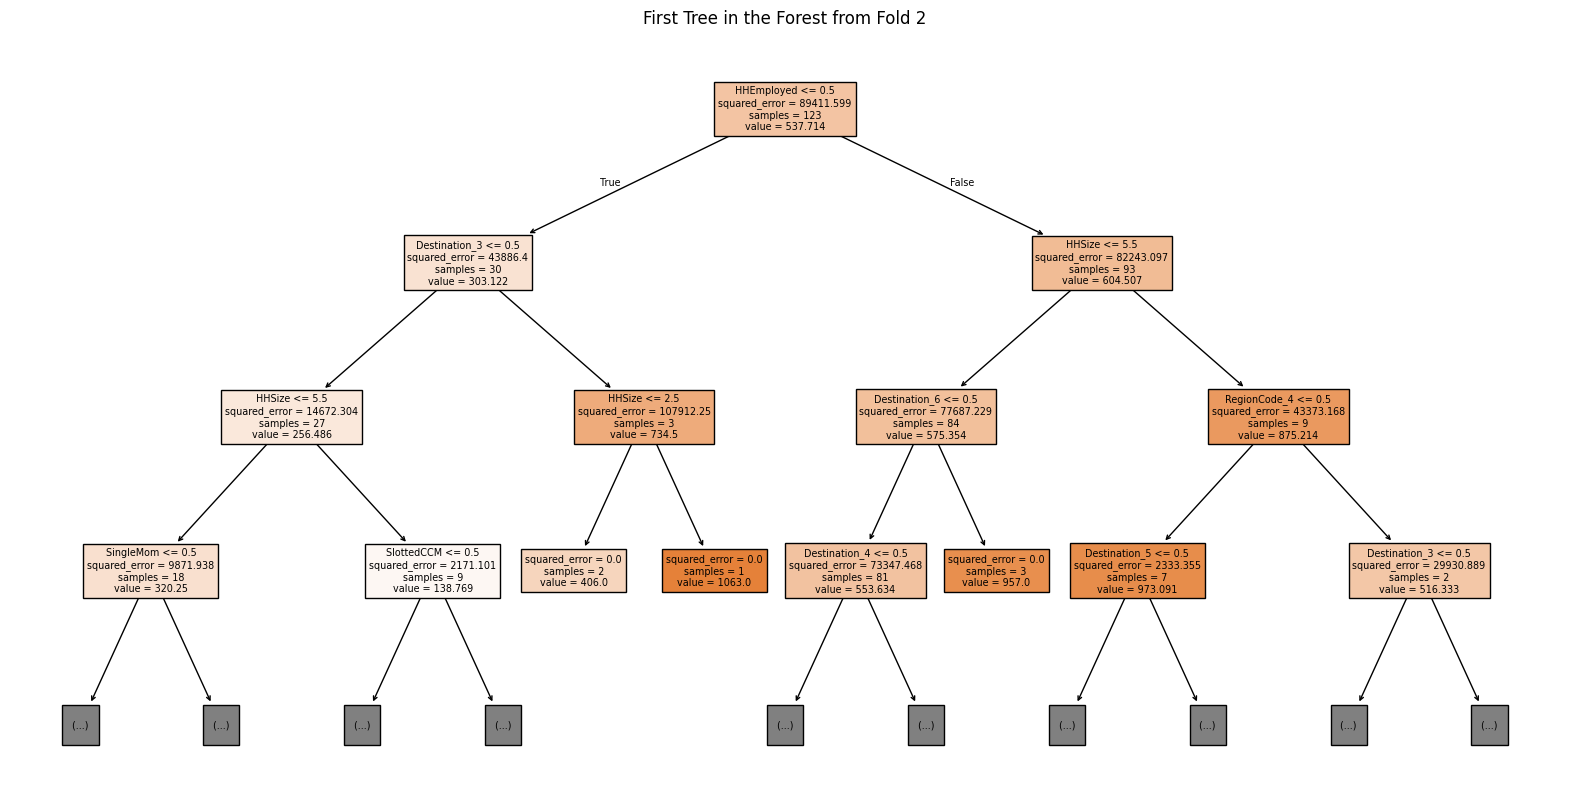

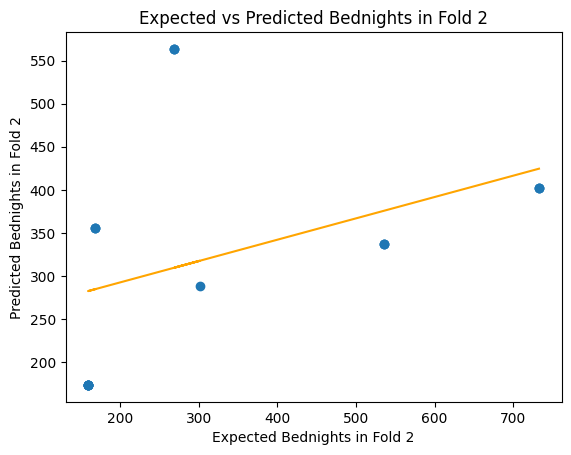

Fold 2 - MSE: 40655.9457, RMSE: 201.6332, R^2: 0.1062
HHSize: 0.2034
HHEmployed: 0.2290
HHTANF: 0.0275
Slotted: 0.0216
SlottedCCM: 0.0323
SlottedPME: 0.0143
SingleMom: 0.0242
SingleDad: 0.0390
SingleParent: 0.0142
Disability: 0.0004
RegionCode_1: 0.0157
RegionCode_2: 0.0208
RegionCode_3: 0.0103
RegionCode_4: 0.0366
RegionCode_5: 0.0000
Destination_2: 0.0005
Destination_3: 0.1010
Destination_4: 0.0419
Destination_5: 0.0194
Destination_6: 0.0355
Destination_7: 0.0050
Destination_8: 0.0216
Destination_9: 0.0070
Destination_10: 0.0225
Destination_11: 0.0106
HHSize_bin_small: 0.0224
HHSize_bin_big: 0.0236


<Figure size 640x480 with 0 Axes>

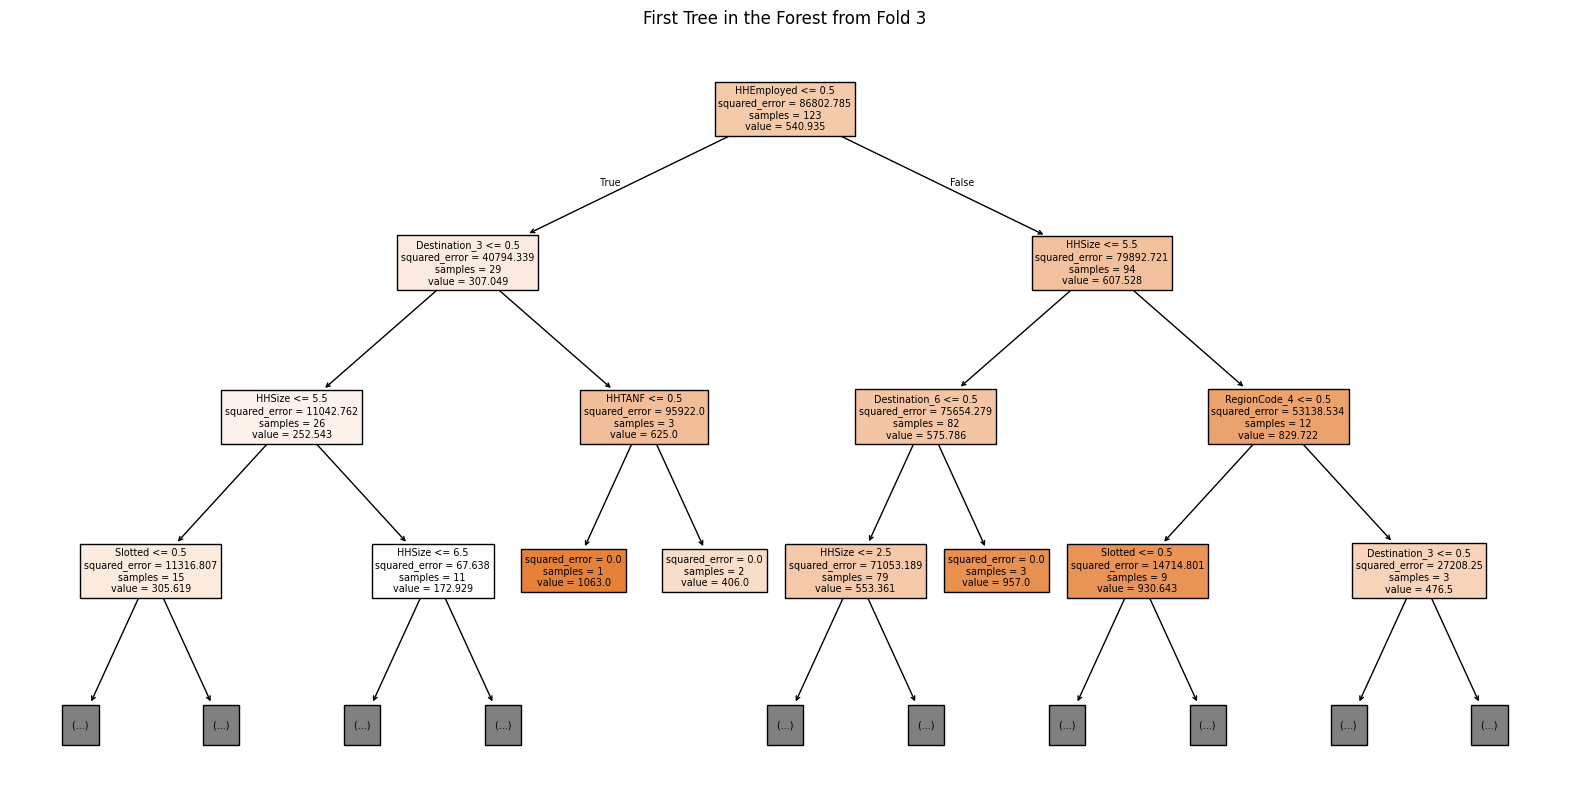

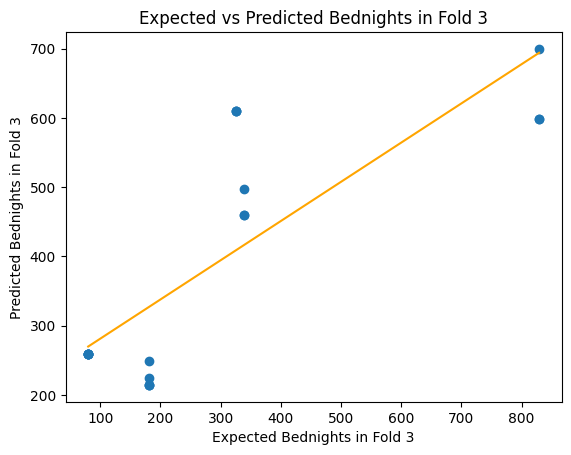

Fold 3 - MSE: 31058.2695, RMSE: 176.2336, R^2: 0.4851
HHSize: 0.2058
HHEmployed: 0.3469
HHTANF: 0.0199
Slotted: 0.0174
SlottedCCM: 0.0210
SlottedPME: 0.0094
SingleMom: 0.0203
SingleDad: 0.0301
SingleParent: 0.0126
Disability: 0.0000
RegionCode_1: 0.0187
RegionCode_2: 0.0148
RegionCode_3: 0.0080
RegionCode_4: 0.0314
RegionCode_5: 0.0000
Destination_2: 0.0006
Destination_3: 0.0443
Destination_4: 0.0335
Destination_5: 0.0229
Destination_6: 0.0357
Destination_7: 0.0068
Destination_8: 0.0132
Destination_9: 0.0055
Destination_10: 0.0220
Destination_11: 0.0209
HHSize_bin_small: 0.0200
HHSize_bin_big: 0.0183


<Figure size 640x480 with 0 Axes>

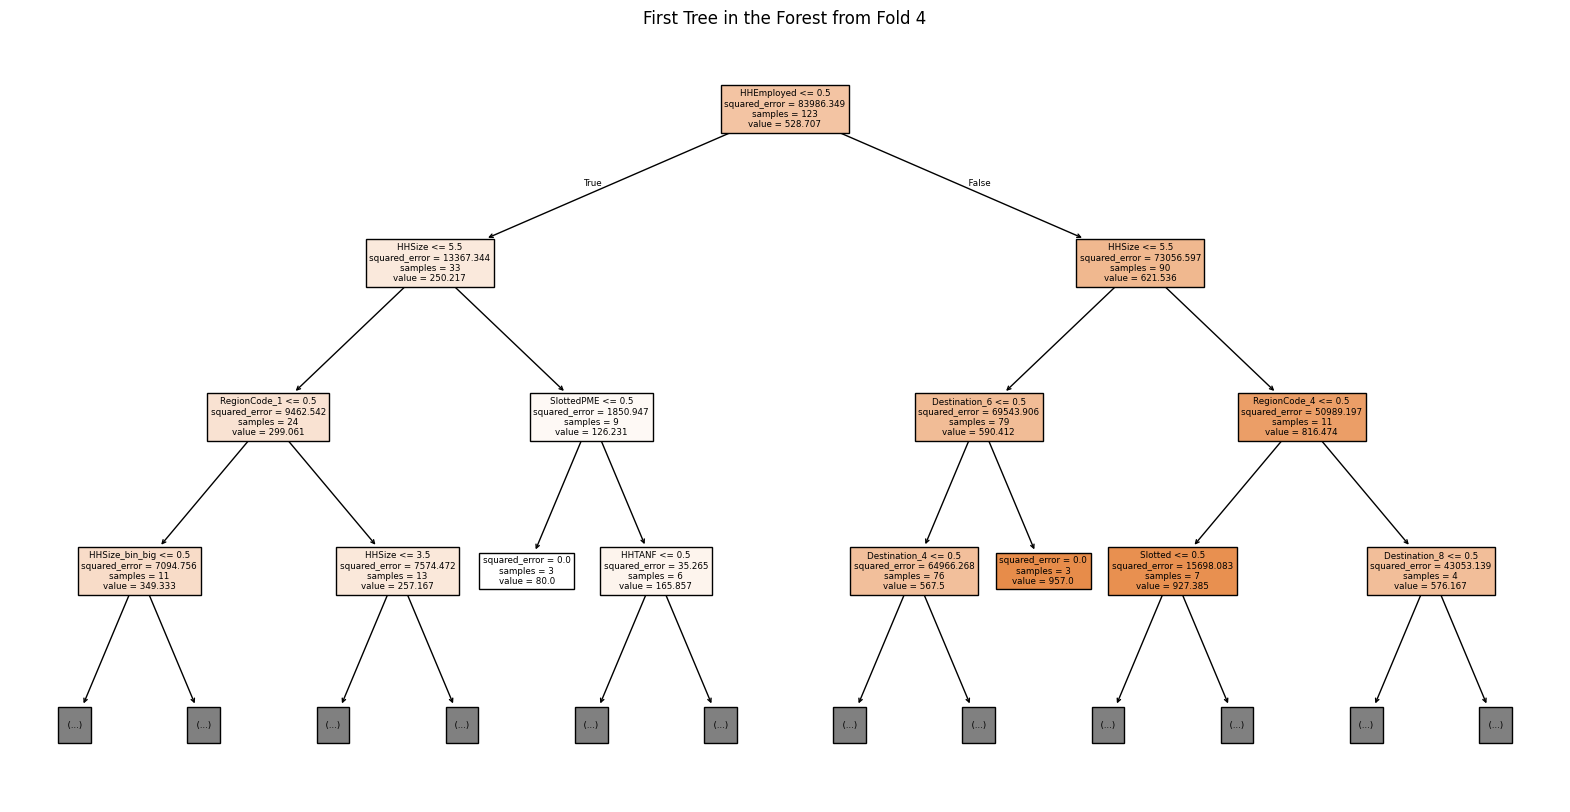

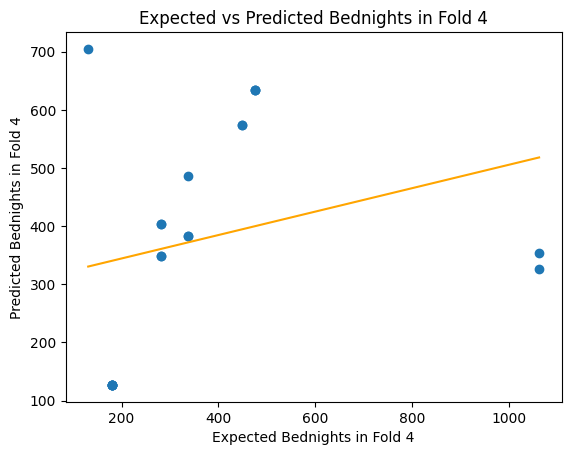

Fold 4 - MSE: 74436.1940, RMSE: 272.8300, R^2: -0.1894
HHSize: 0.1676
HHEmployed: 0.2811
HHTANF: 0.0285
Slotted: 0.0138
SlottedCCM: 0.0309
SlottedPME: 0.0106
SingleMom: 0.0107
SingleDad: 0.0334
SingleParent: 0.0094
Disability: 0.0000
RegionCode_1: 0.0197
RegionCode_2: 0.0144
RegionCode_3: 0.0102
RegionCode_4: 0.0306
RegionCode_5: 0.0000
Destination_2: 0.0004
Destination_3: 0.1145
Destination_4: 0.0412
Destination_5: 0.0154
Destination_6: 0.0431
Destination_7: 0.0100
Destination_8: 0.0136
Destination_9: 0.0004
Destination_10: 0.0278
Destination_11: 0.0241
HHSize_bin_small: 0.0297
HHSize_bin_big: 0.0190


<Figure size 640x480 with 0 Axes>

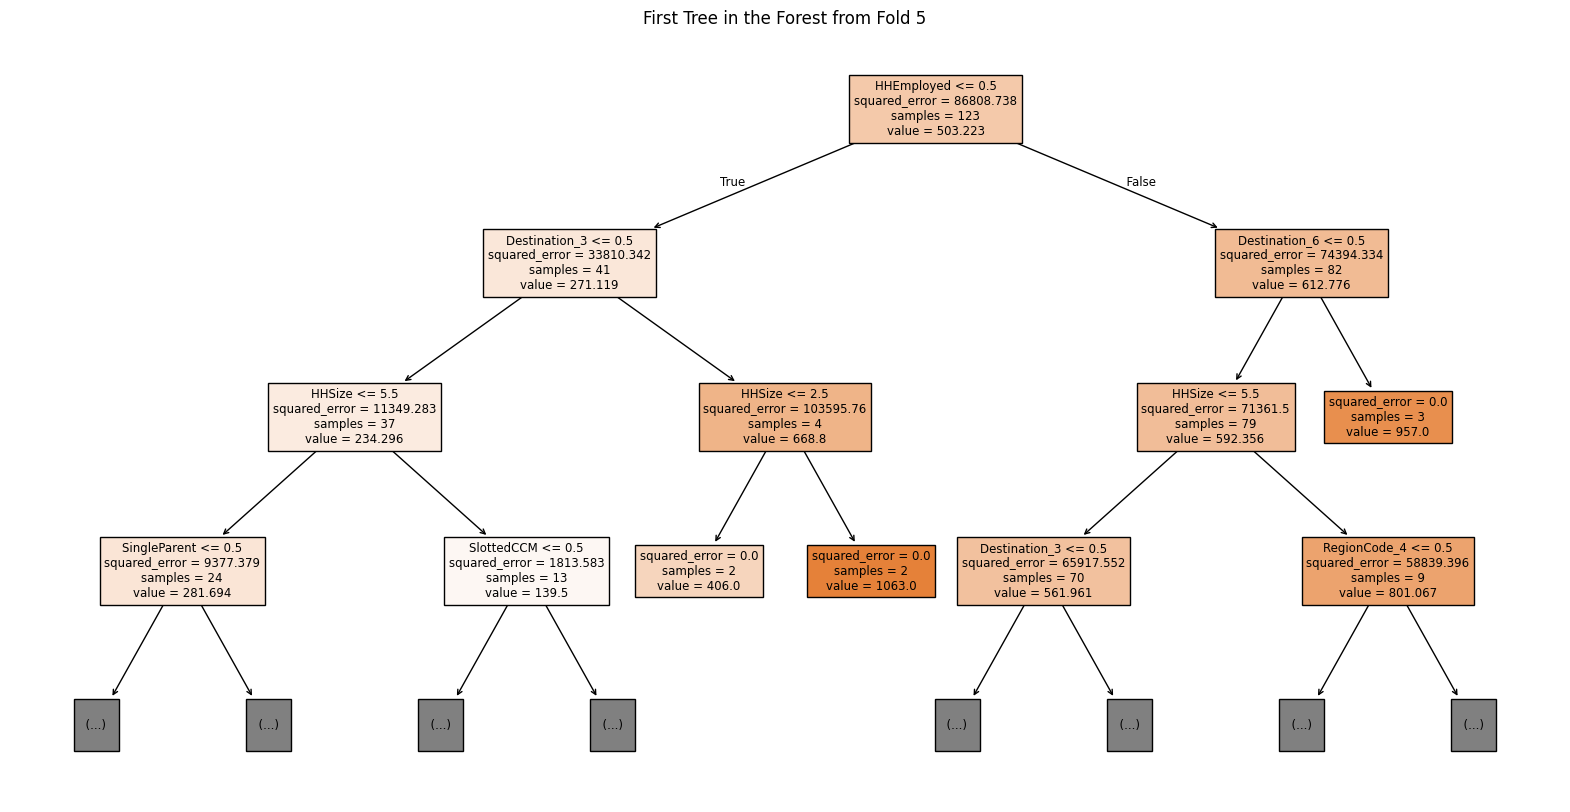

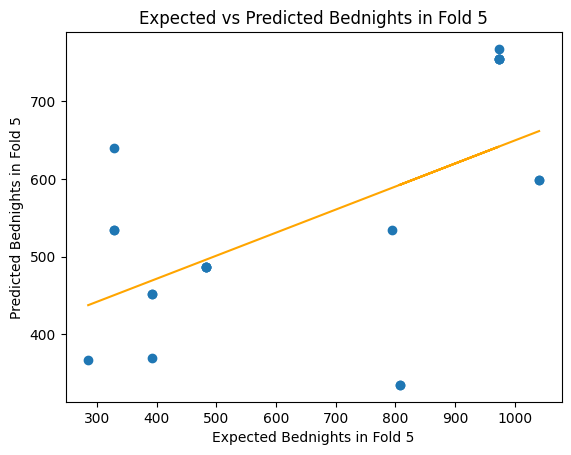

Fold 5 - MSE: 63526.0565, RMSE: 252.0438, R^2: 0.1925
HHSize: 0.2454
HHEmployed: 0.2331
HHTANF: 0.0252
Slotted: 0.0141
SlottedCCM: 0.0177
SlottedPME: 0.0098
SingleMom: 0.0251
SingleDad: 0.0145
SingleParent: 0.0230
Disability: 0.0000
RegionCode_1: 0.0170
RegionCode_2: 0.0341
RegionCode_3: 0.0080
RegionCode_4: 0.0310
RegionCode_5: 0.0000
Destination_2: 0.0004
Destination_3: 0.0860
Destination_4: 0.0401
Destination_5: 0.0305
Destination_6: 0.0452
Destination_7: 0.0033
Destination_8: 0.0077
Destination_9: 0.0063
Destination_10: 0.0235
Destination_11: 0.0244
HHSize_bin_small: 0.0161
HHSize_bin_big: 0.0187


<Figure size 640x480 with 0 Axes>

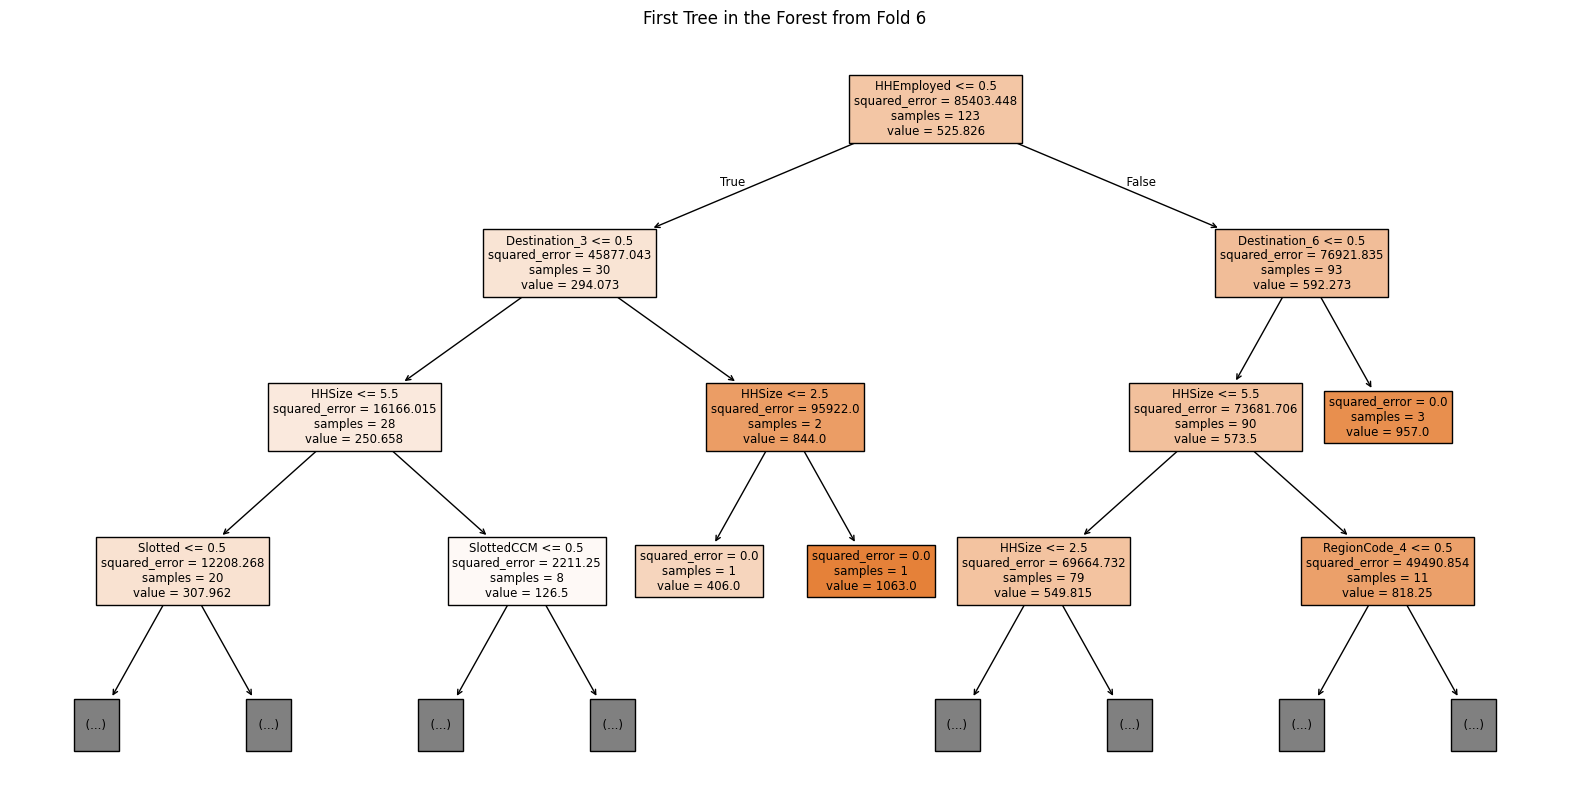

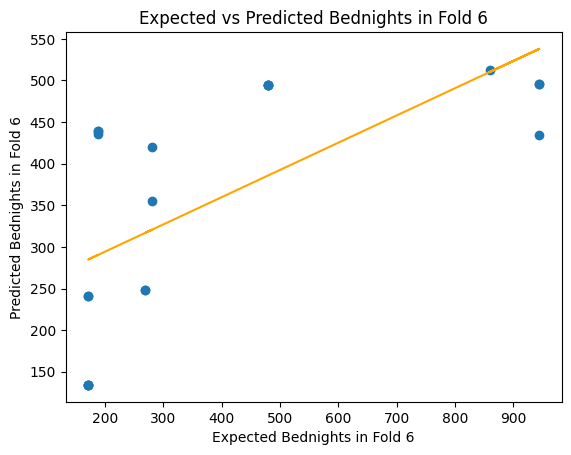

Fold 6 - MSE: 48187.7491, RMSE: 219.5171, R^2: 0.3820
HHSize: 0.1972
HHEmployed: 0.3142
HHTANF: 0.0309
Slotted: 0.0213
SlottedCCM: 0.0254
SlottedPME: 0.0030
SingleMom: 0.0179
SingleDad: 0.0202
SingleParent: 0.0156
Disability: 0.0003
RegionCode_1: 0.0224
RegionCode_2: 0.0186
RegionCode_3: 0.0124
RegionCode_4: 0.0232
RegionCode_5: 0.0000
Destination_2: 0.0004
Destination_3: 0.0847
Destination_4: 0.0354
Destination_5: 0.0428
Destination_6: 0.0390
Destination_7: 0.0034
Destination_8: 0.0228
Destination_9: 0.0086
Destination_10: 0.0000
Destination_11: 0.0167
HHSize_bin_small: 0.0123
HHSize_bin_big: 0.0113


<Figure size 640x480 with 0 Axes>

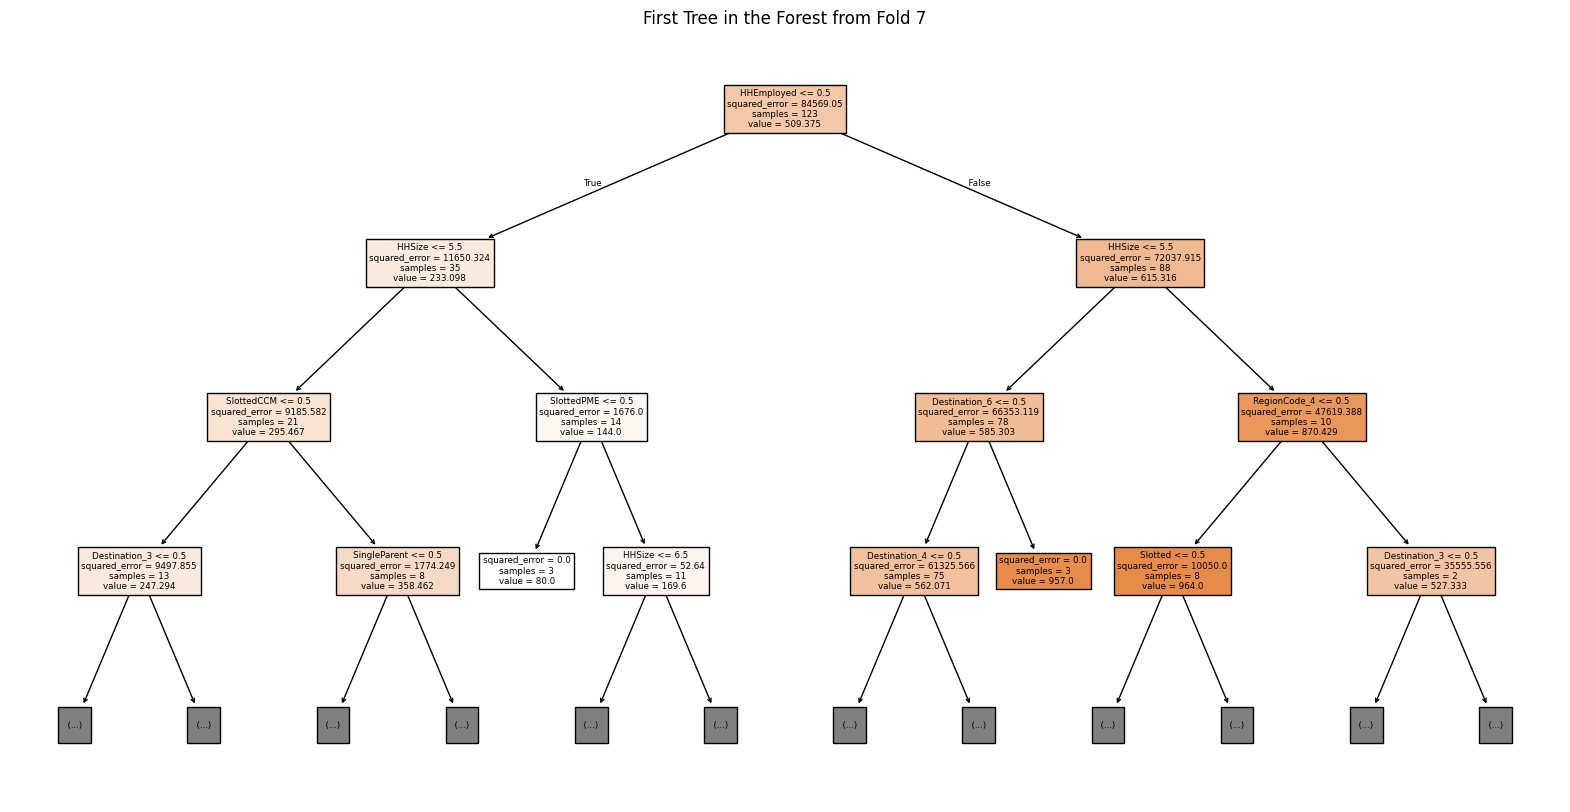

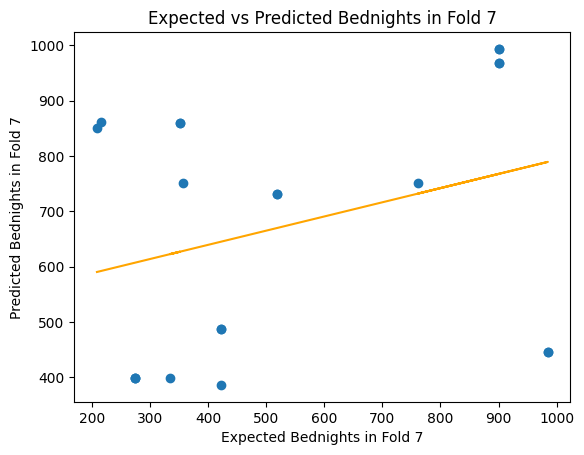

Fold 7 - MSE: 107875.4220, RMSE: 328.4439, R^2: -0.4312
HHSize: 0.1928
HHEmployed: 0.2897
HHTANF: 0.0182
Slotted: 0.0122
SlottedCCM: 0.0153
SlottedPME: 0.0040
SingleMom: 0.0273
SingleDad: 0.0128
SingleParent: 0.0144
Disability: 0.0000
RegionCode_1: 0.0149
RegionCode_2: 0.0142
RegionCode_3: 0.0093
RegionCode_4: 0.0337
RegionCode_5: 0.0000
Destination_2: 0.0003
Destination_3: 0.1322
Destination_4: 0.0423
Destination_5: 0.0048
Destination_6: 0.0000
Destination_7: 0.0000
Destination_8: 0.0102
Destination_9: 0.0069
Destination_10: 0.0241
Destination_11: 0.0208
HHSize_bin_small: 0.0531
HHSize_bin_big: 0.0465


<Figure size 640x480 with 0 Axes>

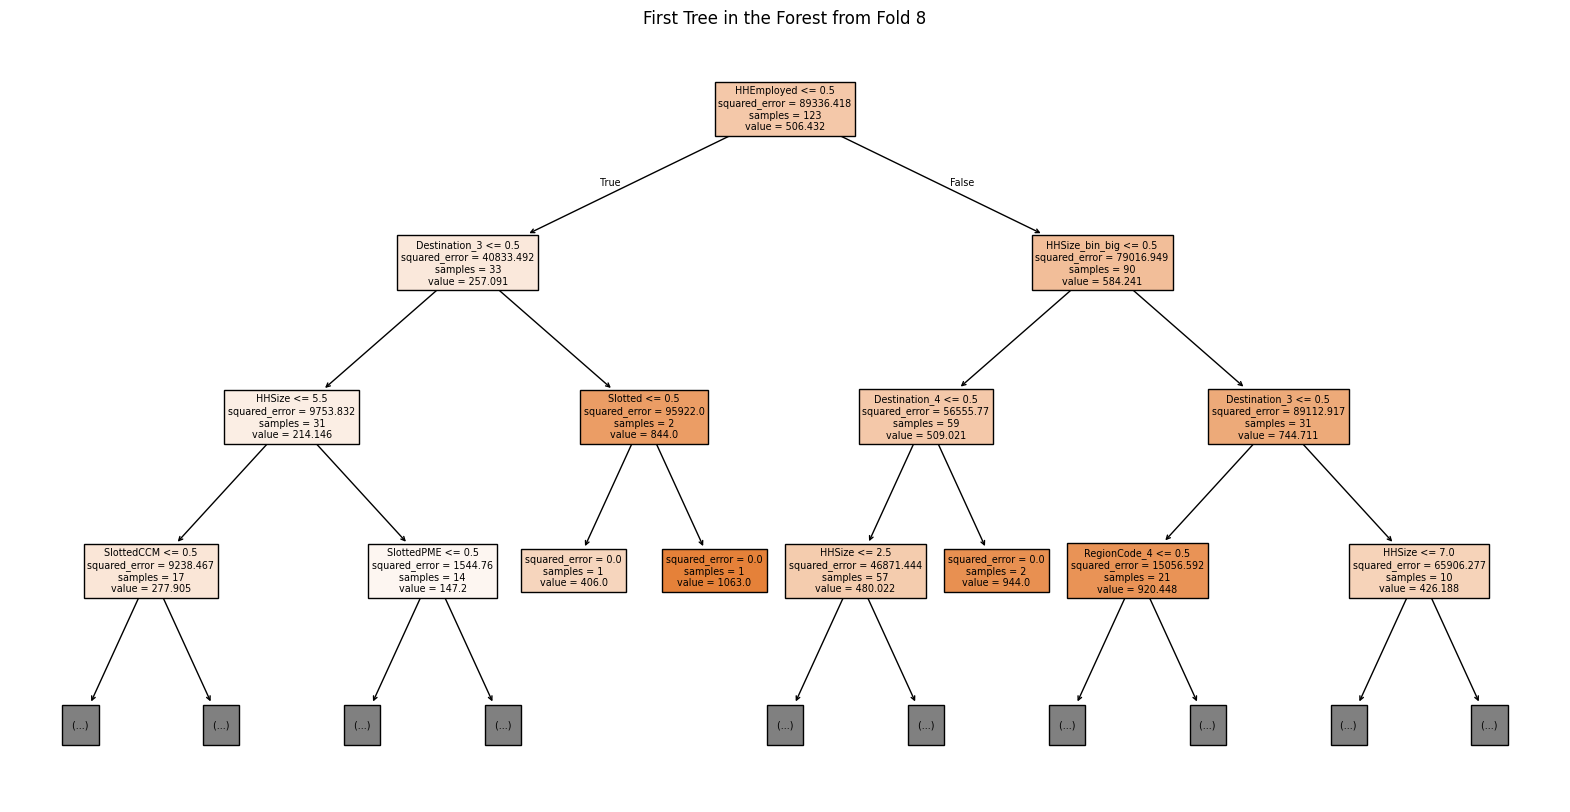

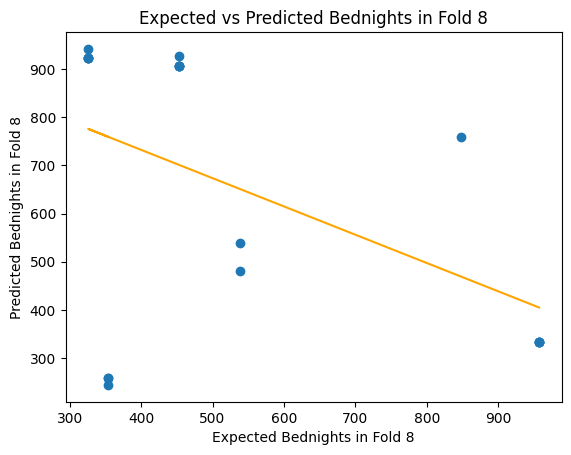

Fold 8 - MSE: 221970.2984, RMSE: 471.1372, R^2: -2.8270
HHSize: 0.2047
HHEmployed: 0.2908
HHTANF: 0.0176
Slotted: 0.0156
SlottedCCM: 0.0175
SlottedPME: 0.0138
SingleMom: 0.0317
SingleDad: 0.0232
SingleParent: 0.0077
Disability: 0.0004
RegionCode_1: 0.0146
RegionCode_2: 0.0142
RegionCode_3: 0.0140
RegionCode_4: 0.0354
RegionCode_5: 0.0004
Destination_2: 0.0009
Destination_3: 0.0735
Destination_4: 0.0359
Destination_5: 0.0237
Destination_6: 0.0426
Destination_7: 0.0039
Destination_8: 0.0219
Destination_9: 0.0039
Destination_10: 0.0257
Destination_11: 0.0237
HHSize_bin_small: 0.0216
HHSize_bin_big: 0.0209


<Figure size 640x480 with 0 Axes>

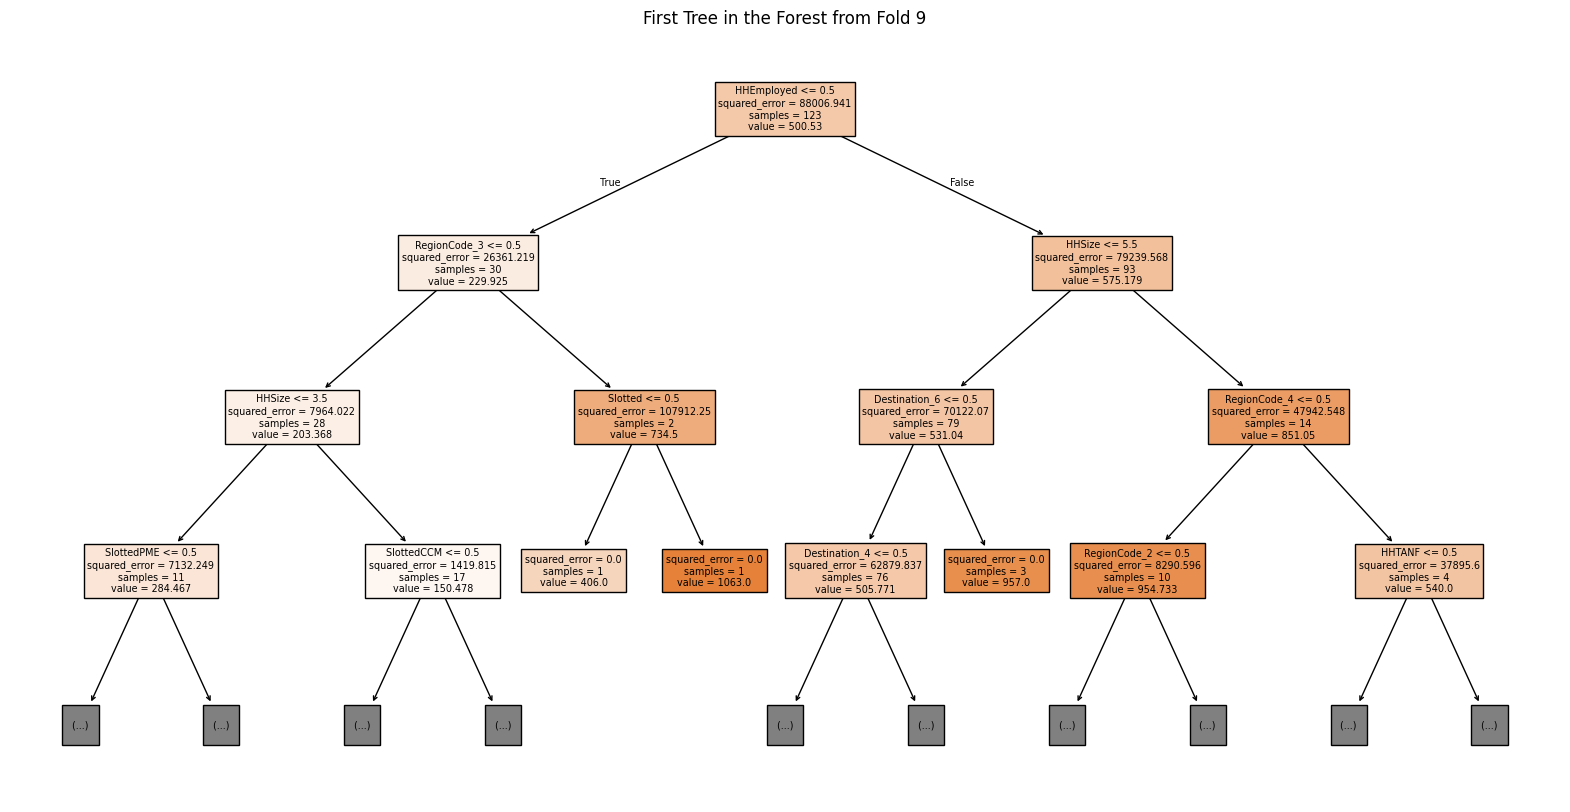

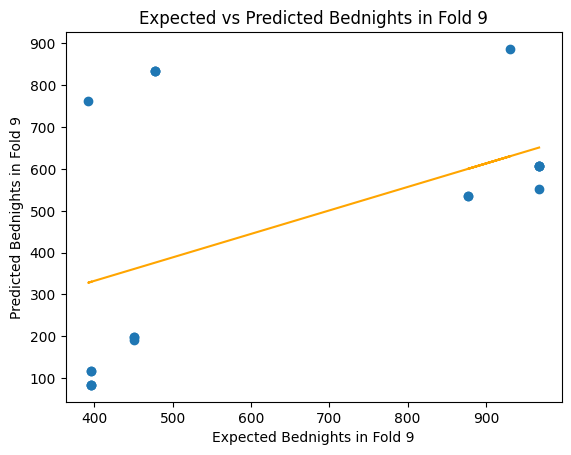

Fold 9 - MSE: 104502.1049, RMSE: 323.2679, R^2: -0.6311
HHSize: 0.2346
HHEmployed: 0.2851
HHTANF: 0.0349
Slotted: 0.0378
SlottedCCM: 0.0113
SlottedPME: 0.0042
SingleMom: 0.0274
SingleDad: 0.0316
SingleParent: 0.0094
Disability: 0.0000
RegionCode_1: 0.0214
RegionCode_2: 0.0227
RegionCode_3: 0.0107
RegionCode_4: 0.0301
RegionCode_5: 0.0003
Destination_2: 0.0005
Destination_3: 0.1018
Destination_4: 0.0010
Destination_5: 0.0075
Destination_6: 0.0391
Destination_7: 0.0034
Destination_8: 0.0259
Destination_9: 0.0047
Destination_10: 0.0175
Destination_11: 0.0157
HHSize_bin_small: 0.0135
HHSize_bin_big: 0.0078


<Figure size 640x480 with 0 Axes>

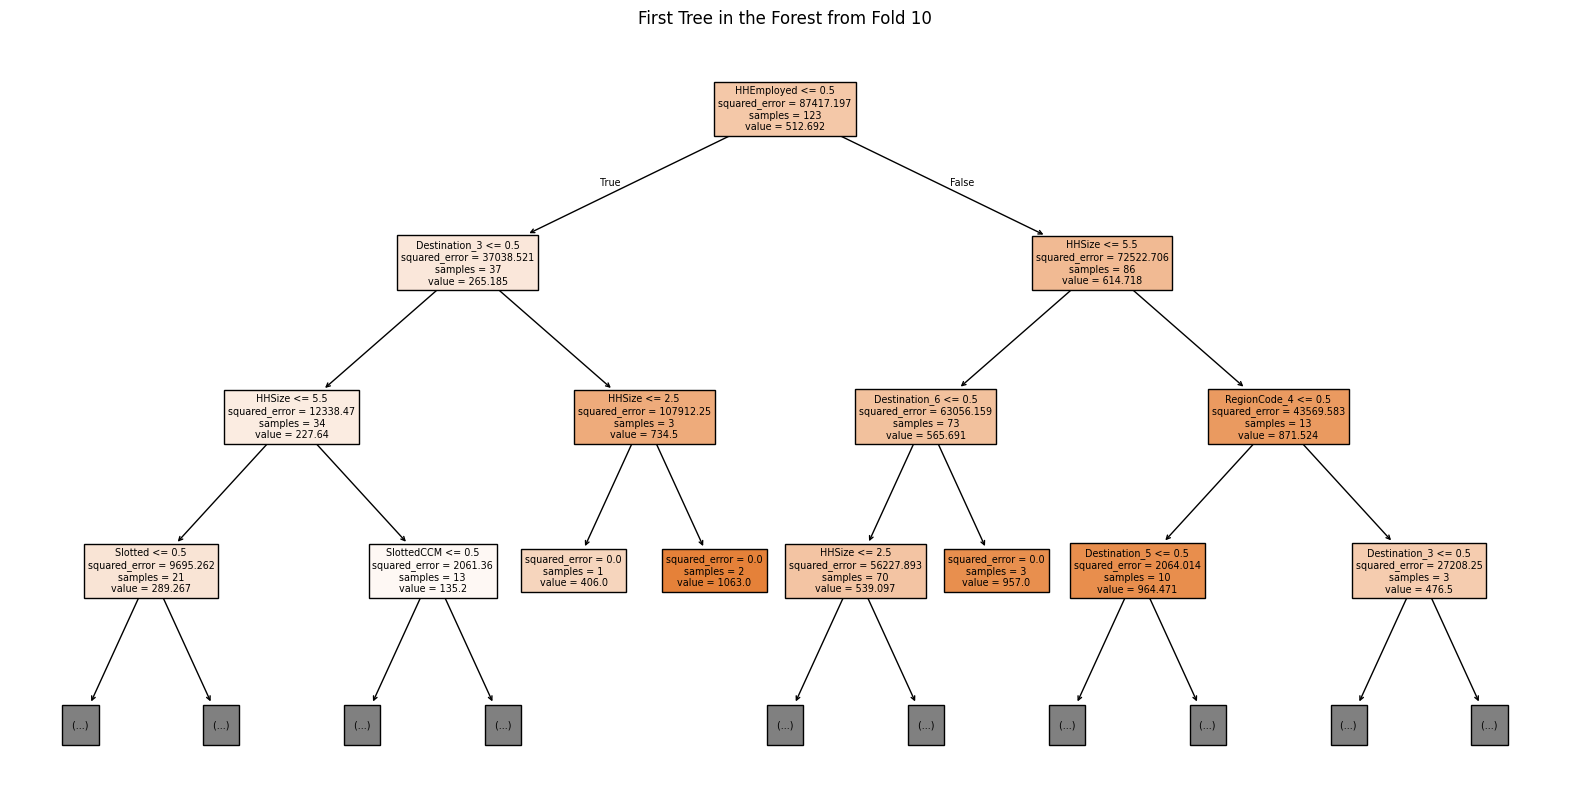

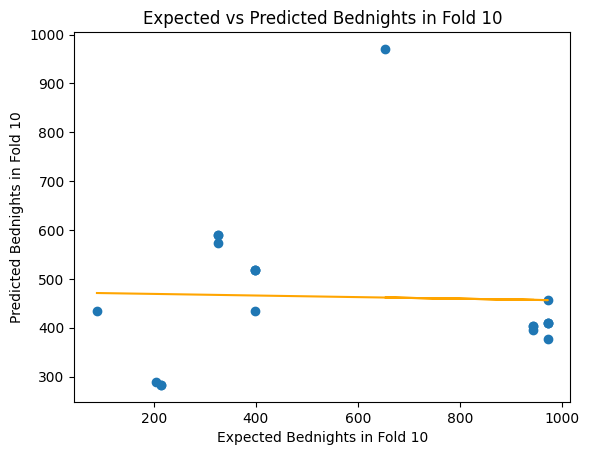

Fold 10 - MSE: 147118.6239, RMSE: 383.5605, R^2: -0.3674


<Figure size 640x480 with 0 Axes>

In [4]:
##Forest Regression: predict bednights. GKF - set up folds for cross validation and to handle autocorrelation
gkf = GroupKFold(n_splits=10)

##Loop through folds to split the data for testing and training, fitting model, show fitness, and evaluate
for fold, (train_idx, test_idx) in enumerate(gkf.split(x, y, groups)):
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    ##train (pipeline handles transforming data and training the model at the same time and reproducibly, it's coming together in my head)
    ##get estimators and column names to show tree
    ##get importances of each feature to improve model
    model = RandomForestRegressor(random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    first_tree = model.estimators_[0]
    feature_names = x.columns
    importances = model.feature_importances_
    for name, importance in zip(
        feature_names, importances):
        print(f'{name}: {importance:.4f}')

    ##show tree
    plt.figure(figsize=(20, 10))
    plot_tree(first_tree,
             feature_names=feature_names,
             filled=True,
             rounded=False,
             max_depth=3)
    plt.title(f'First Tree in the Forest from Fold {fold+1}')
    plt.show()
    plt.clf()

    ##show fitness
    plt.scatter(y_test, y_pred)
    plt.xlabel(f'Expected Bednights in Fold {fold+1}')
    plt.ylabel(f'Predicted Bednights in Fold {fold+1}')
    plt.title(f'Expected vs Predicted Bednights in Fold {fold+1}')
    a, b = np.polyfit(y_test, y_pred, 1)
    plt.plot(y_test, a * y_test + b, color='orange')
    plt.show()
    plt.clf()

    ##Evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Fold {fold+1} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}')

Goal 2: Improve. Random Forest Regression has worse R^2 values than Linear Regression. Retrain using aggregate importances and subset of features to maximize cross-validated r2.

In [5]:
##Improve Forest Regression: predict bednights. initialize variables / lists
importances_all_folds = []

In [6]:
##Improve Forest Regression: predict bednights. Train multiple models to select features and collect importances
for fold, (train_idx, test_idx) in enumerate(gkf.split(x,y,groups)):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]

    model = RandomForestRegressor(random_state = 42)
    model.fit(x_train, y_train)

    importances_all_folds.append(model.feature_importances_)
    
importances_all_folds = np.array(importances_all_folds)

In [7]:
##Improve Forest Regression: predict bednights. aggregate and df importances to choose most effective features for the model most easily, dynamically
mean_importances = np.mean(importances_all_folds, axis=0)
feature_importances = pd.DataFrame({
    'feature': x.columns,
    'importance': mean_importances}).sort_values(by='importance',ascending=False)
print(feature_importances)

             feature  importance
1         HHEmployed    0.277504
0             HHSize    0.196875
16     Destination_3    0.100448
19     Destination_6    0.036219
17     Destination_4    0.035582
7          SingleDad    0.031096
13      RegionCode_4    0.029385
2             HHTANF    0.025564
25  HHSize_bin_small    0.023480
6          SingleMom    0.022823
4         SlottedCCM    0.021712
26    HHSize_bin_big    0.021269
23    Destination_10    0.020926
24    Destination_11    0.020121
18     Destination_5    0.019878
3            Slotted    0.018884
11      RegionCode_2    0.018048
10      RegionCode_1    0.017822
21     Destination_8    0.015612
8       SingleParent    0.014037
12      RegionCode_3    0.009837
5         SlottedPME    0.009141
20     Destination_7    0.006936
22     Destination_9    0.006140
15     Destination_2    0.000468
9         Disability    0.000113
14      RegionCode_5    0.000080


In [8]:
##Improve Forest Regression: predict bednights. define thresholds, select features with importance above threshold,
##train and cross validate a model with gkf using selected features, identify best r2 and best features,
##Define thresholds and select features
thresholds = np.linspace(0, mean_importances.max(), num=20)

##initialize best_score and best_scores
best_score = -np.inf
best_features = None

##select features and train models with each subset to determine best r2 and best model
for thresh in thresholds:
    selected_features = feature_importances[feature_importances['importance'] >= thresh]['feature'].tolist()

    if not selected_features:
        continue

    x_selected = x[selected_features]

    ##train models and cross validate with gkf
    model = RandomForestRegressor(random_state = 42)
    scores = cross_val_score(model, x_selected, y, cv=gkf, groups=groups, scoring='r2')

    mean_score = np.mean(scores)
    print(f'Threshold {thresh:.4f}: Selected {len(selected_features)} features, Mean R^2 = {mean_score:.4f}')

    ##idenitfy best score and features
    if mean_score > best_score:
        best_score = mean_score
        best_features = selected_features

##Display best score and features
print(f'Selected {len(best_features)} features with mean R^2 = {best_score:.4f}')
print('Selected features', best_features)

Threshold 0.0000: Selected 27 features, Mean R^2 = -0.4403
Threshold 0.0146: Selected 19 features, Mean R^2 = -0.4591
Threshold 0.0292: Selected 7 features, Mean R^2 = -0.0200
Threshold 0.0438: Selected 3 features, Mean R^2 = -0.2323
Threshold 0.0584: Selected 3 features, Mean R^2 = -0.2323
Threshold 0.0730: Selected 3 features, Mean R^2 = -0.2323
Threshold 0.0876: Selected 3 features, Mean R^2 = -0.2323
Threshold 0.1022: Selected 2 features, Mean R^2 = 0.0664
Threshold 0.1168: Selected 2 features, Mean R^2 = 0.0664
Threshold 0.1314: Selected 2 features, Mean R^2 = 0.0664
Threshold 0.1461: Selected 2 features, Mean R^2 = 0.0664
Threshold 0.1607: Selected 2 features, Mean R^2 = 0.0664
Threshold 0.1753: Selected 2 features, Mean R^2 = 0.0664
Threshold 0.1899: Selected 2 features, Mean R^2 = 0.0664
Threshold 0.2045: Selected 1 features, Mean R^2 = -0.0005
Threshold 0.2191: Selected 1 features, Mean R^2 = -0.0005
Threshold 0.2337: Selected 1 features, Mean R^2 = -0.0005
Threshold 0.2483: S

Goal: train model using the best feature identified above

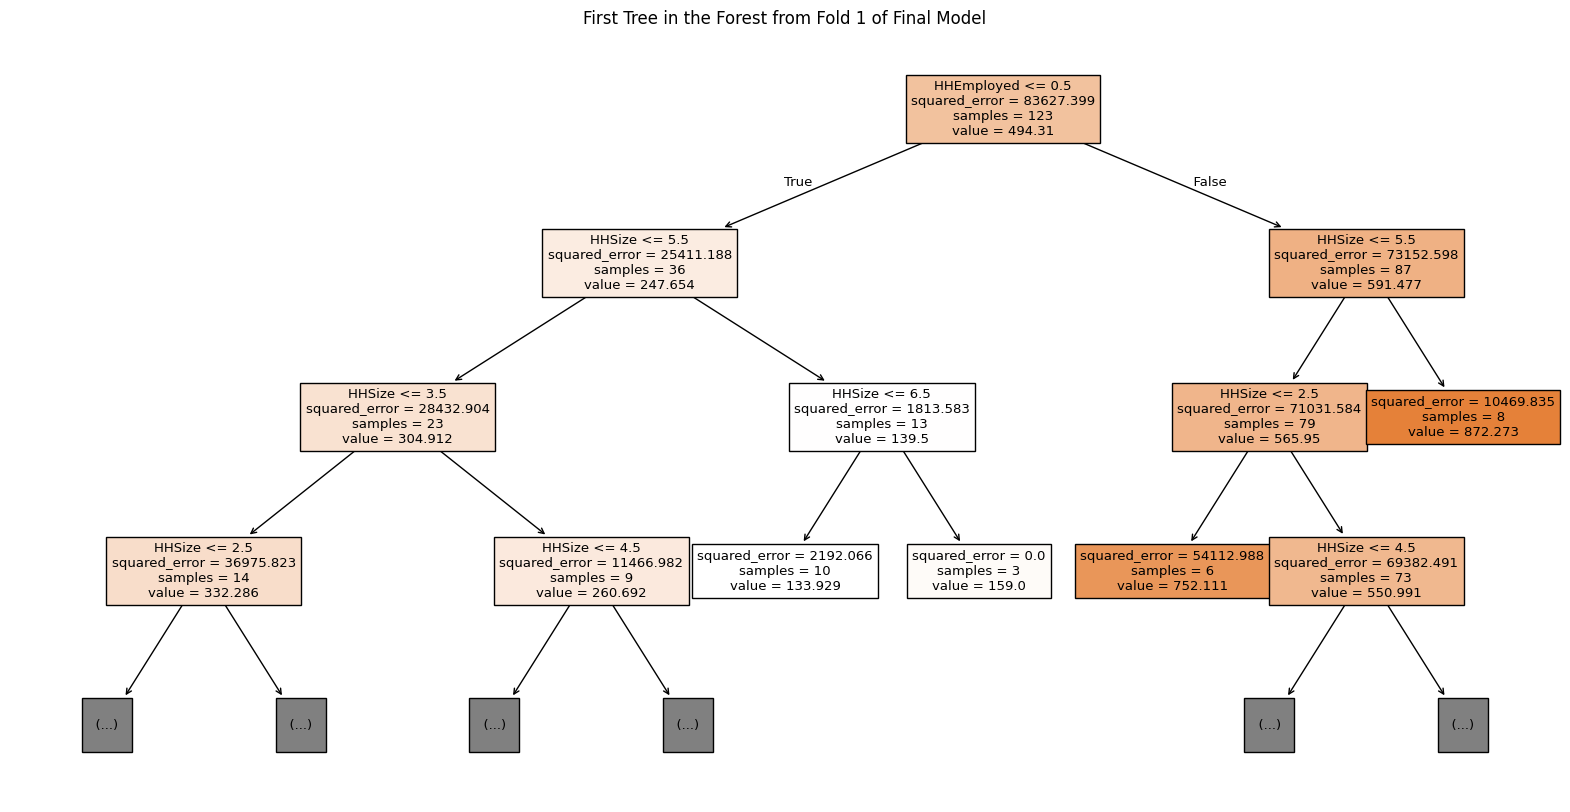

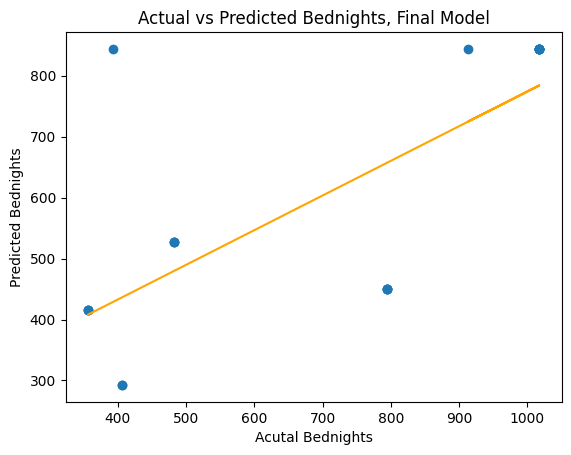

Fold 1 - MSE: 44444.7193, RMSE: 210.8192, R^2: 0.3948


<Figure size 640x480 with 0 Axes>

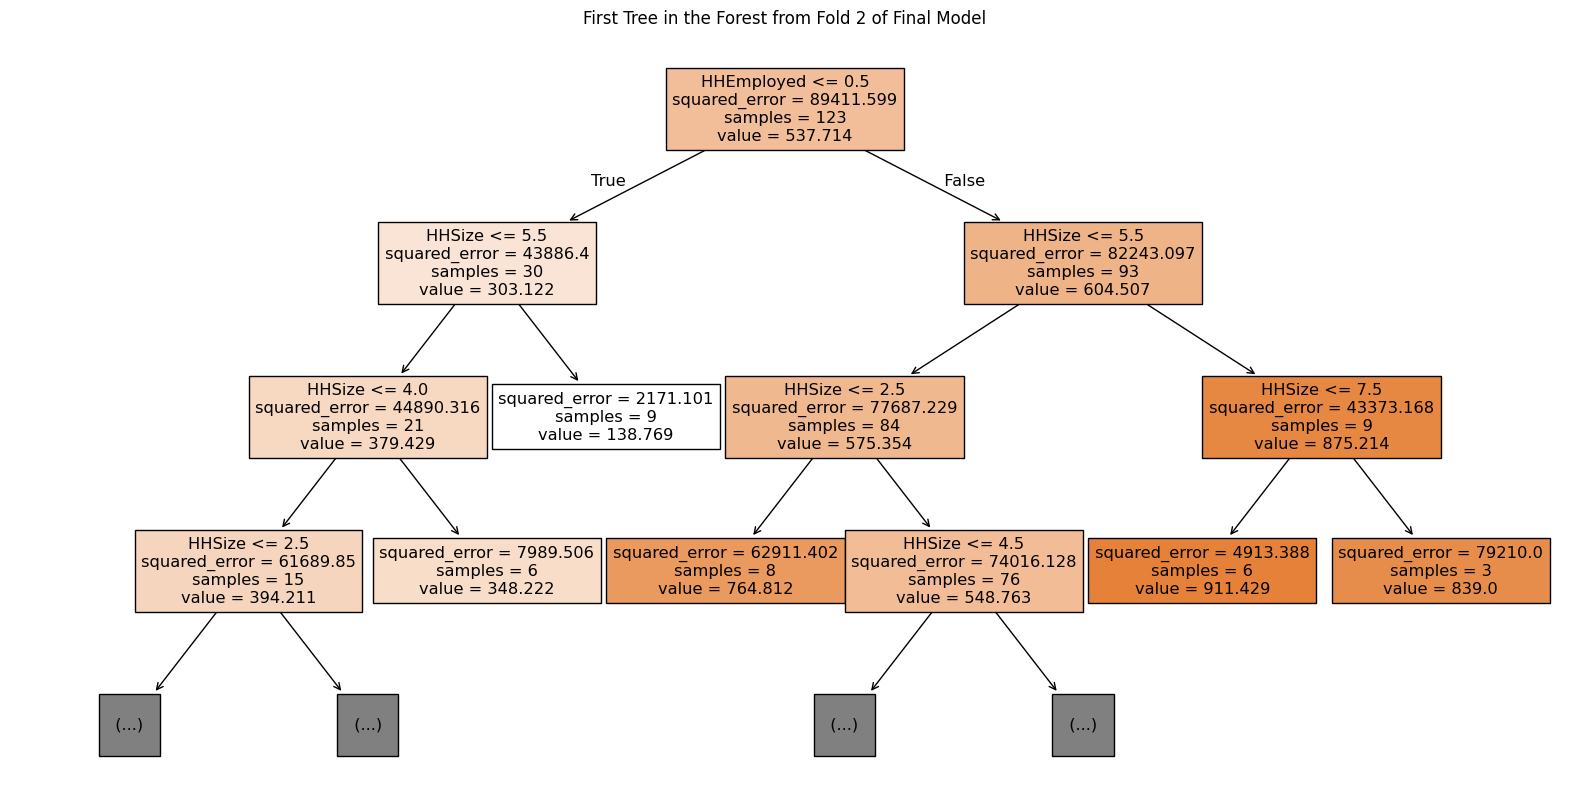

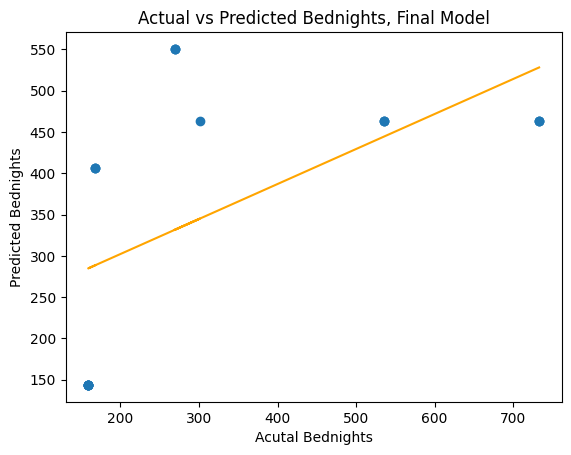

Fold 2 - MSE: 33609.9809, RMSE: 183.3303, R^2: 0.2611


<Figure size 640x480 with 0 Axes>

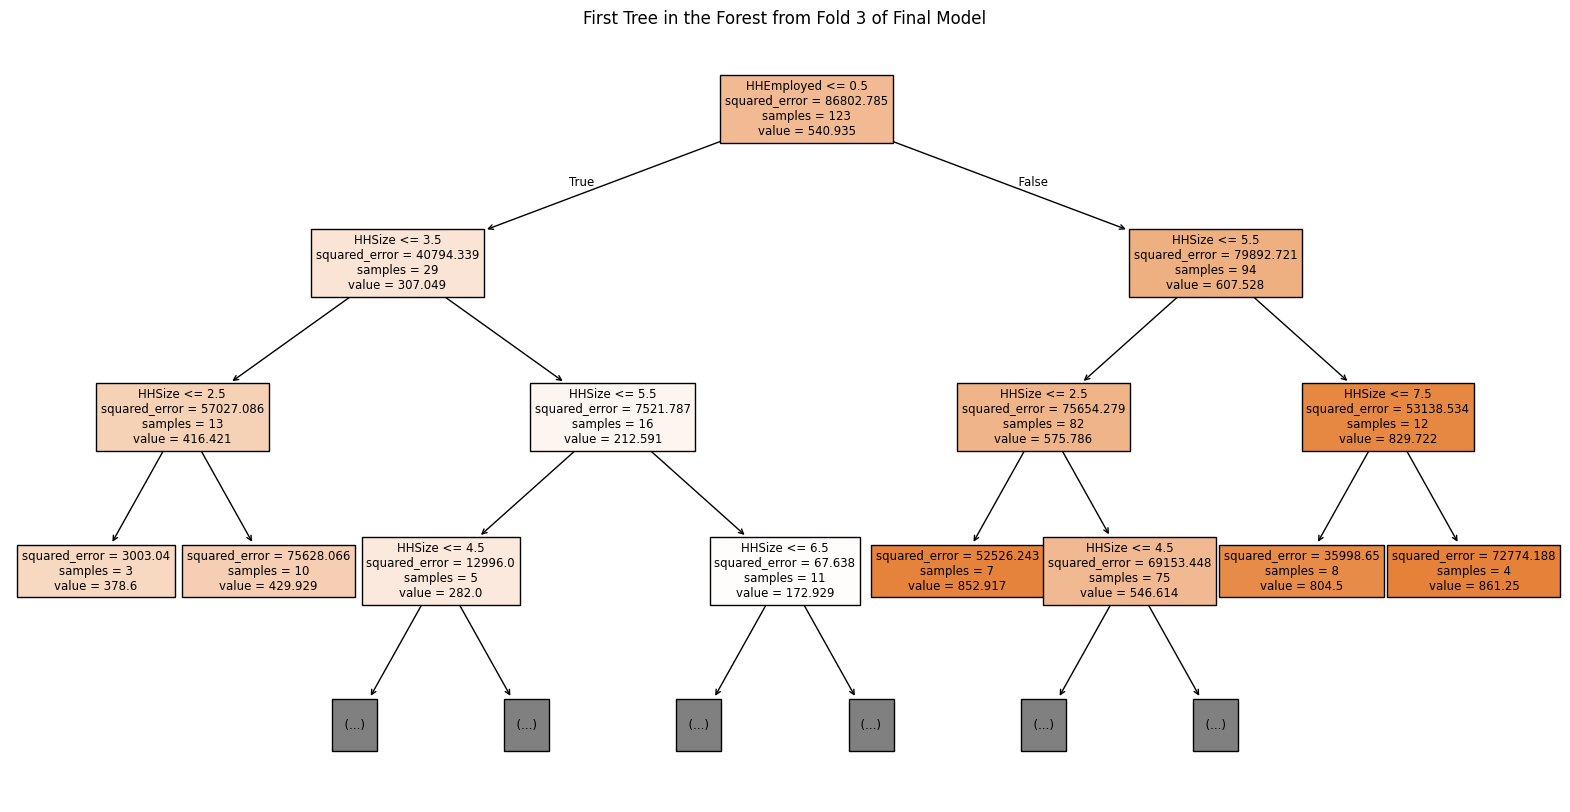

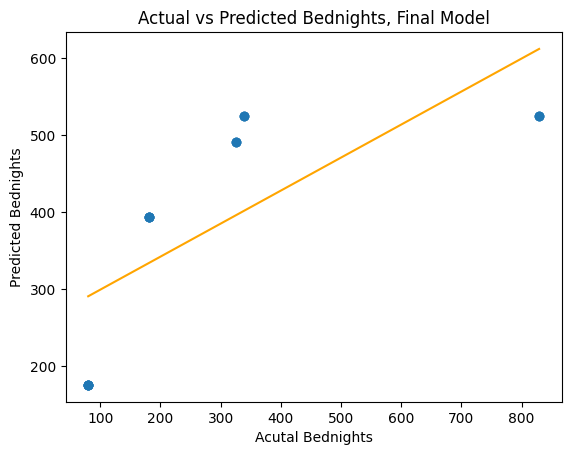

Fold 3 - MSE: 37212.0510, RMSE: 192.9043, R^2: 0.3831


<Figure size 640x480 with 0 Axes>

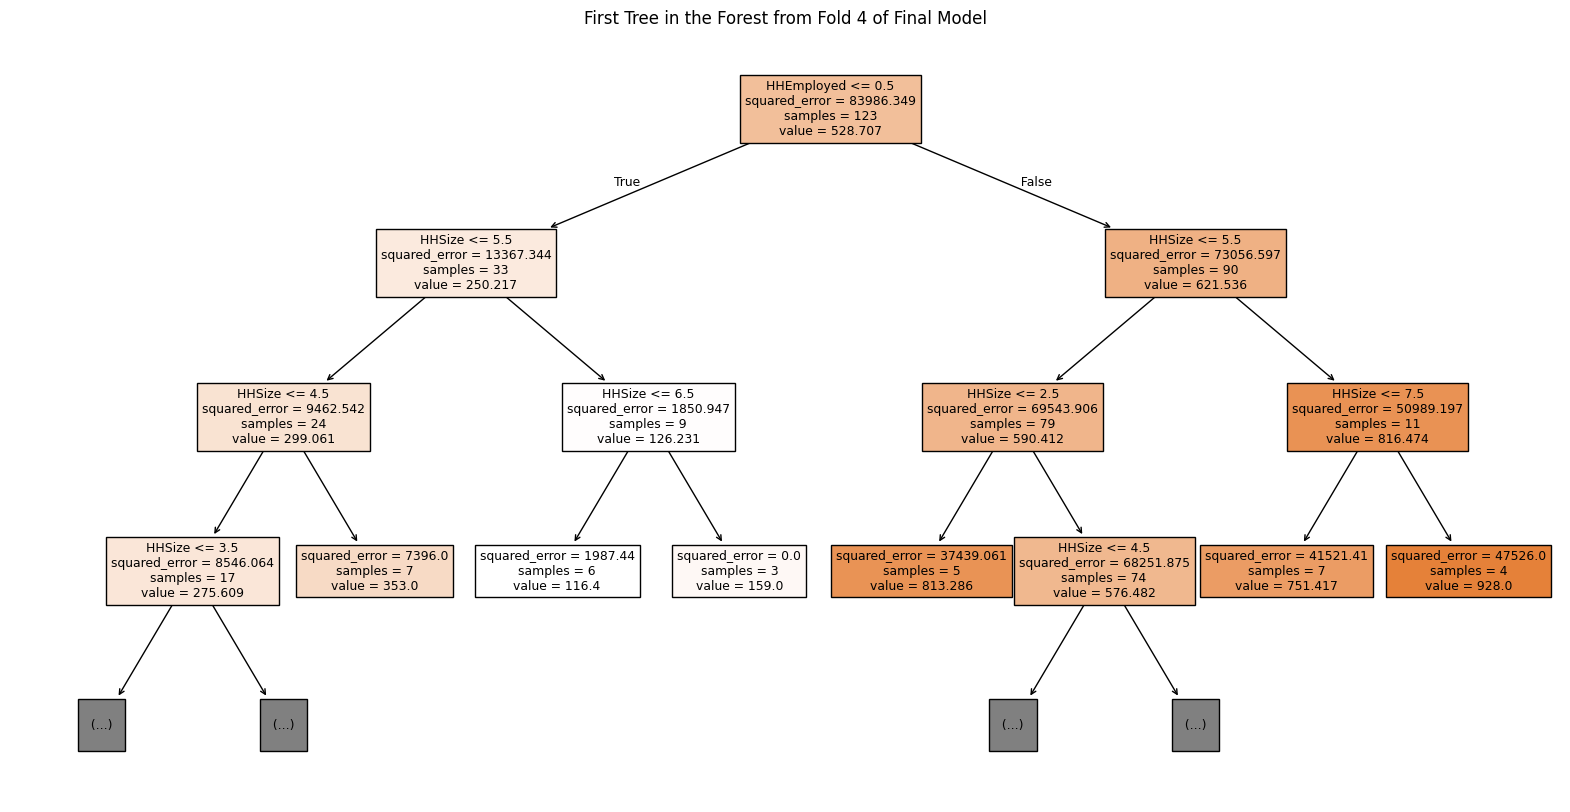

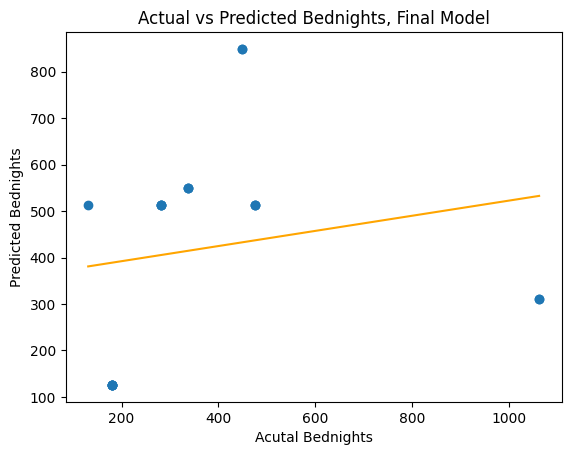

Fold 4 - MSE: 93591.9617, RMSE: 305.9280, R^2: -0.4954


<Figure size 640x480 with 0 Axes>

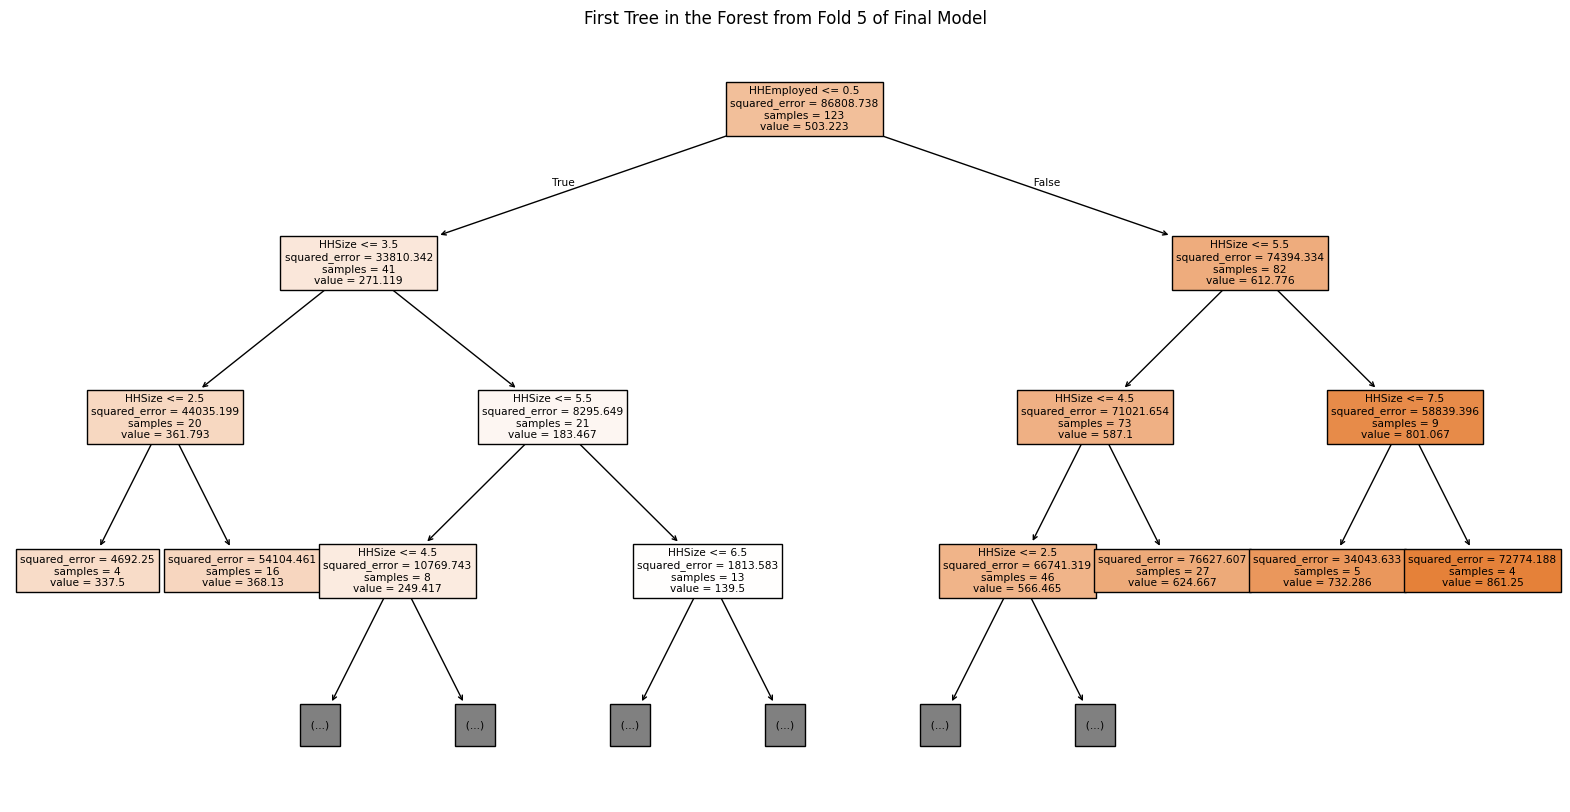

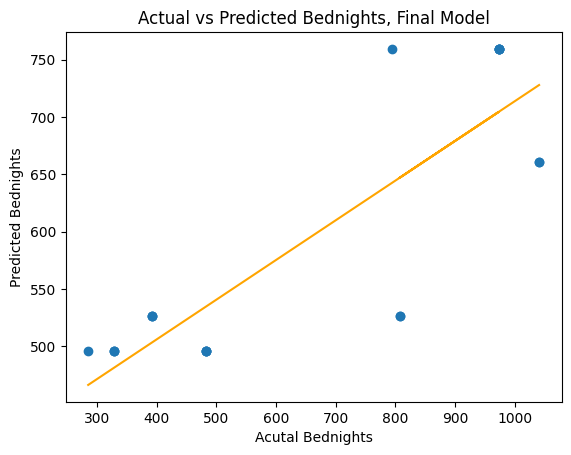

Fold 5 - MSE: 40844.9277, RMSE: 202.1013, R^2: 0.4808


<Figure size 640x480 with 0 Axes>

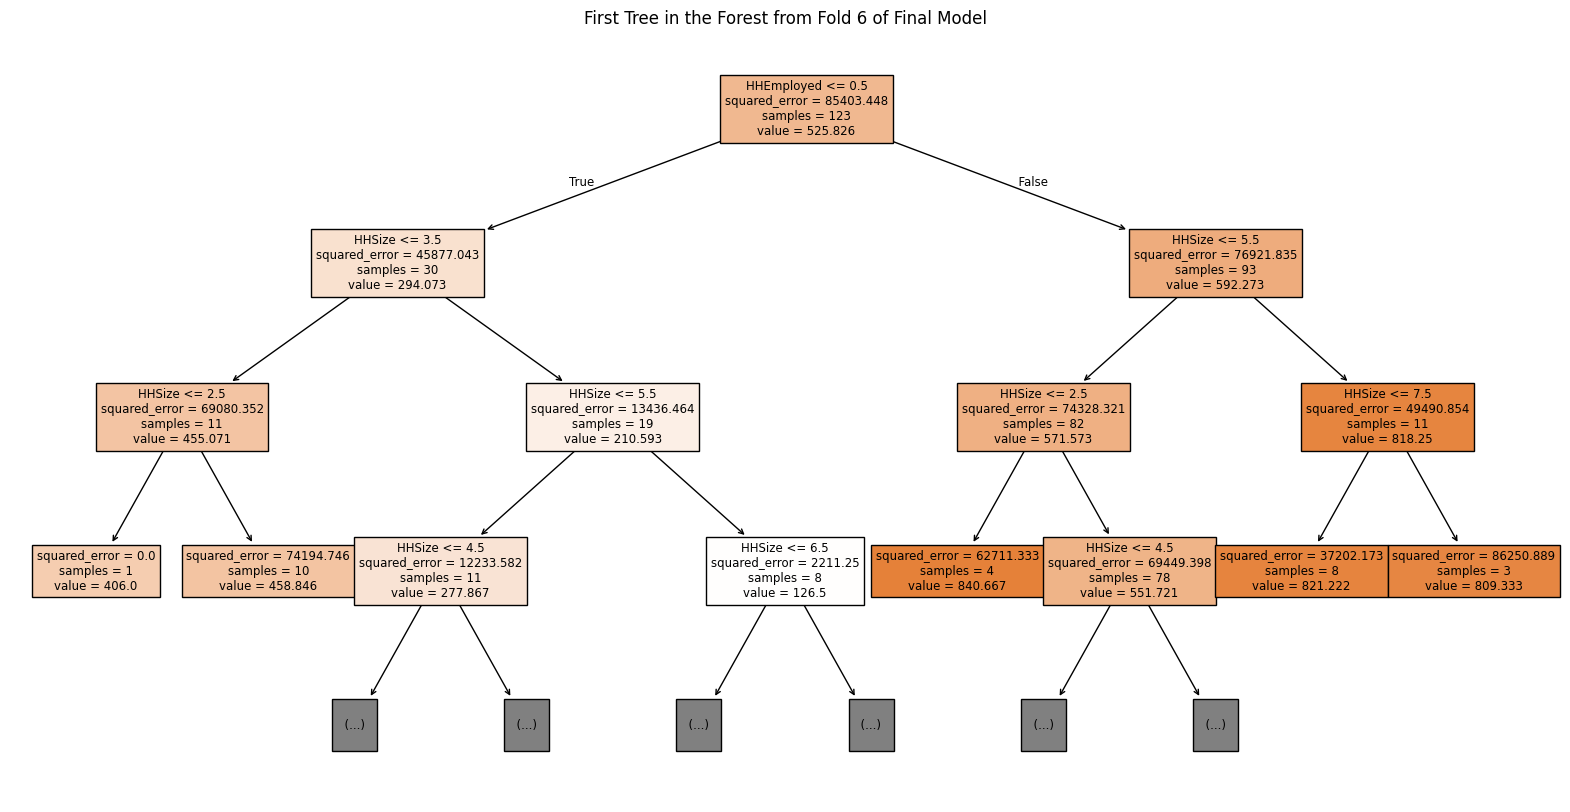

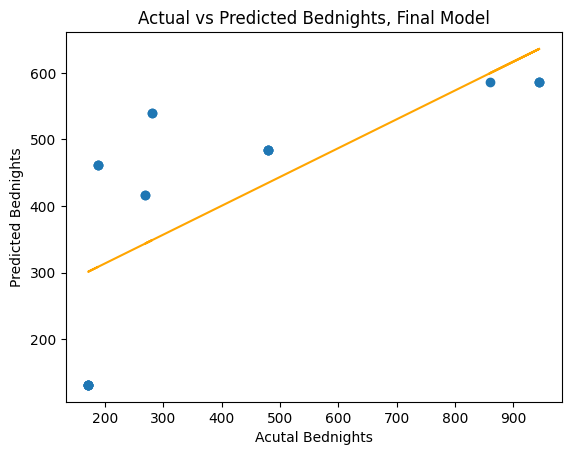

Fold 6 - MSE: 41483.1283, RMSE: 203.6741, R^2: 0.4680


<Figure size 640x480 with 0 Axes>

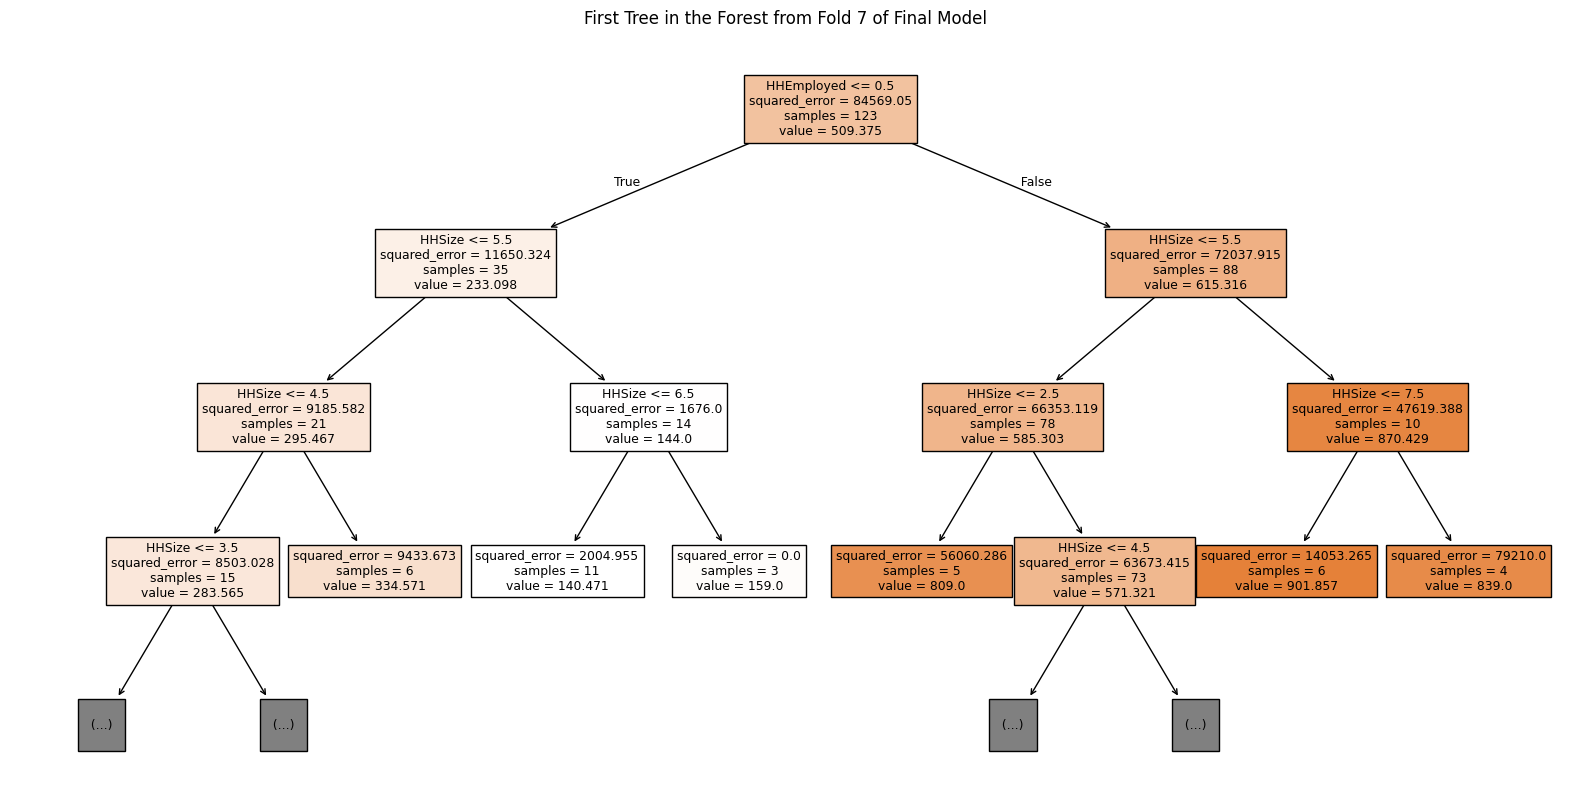

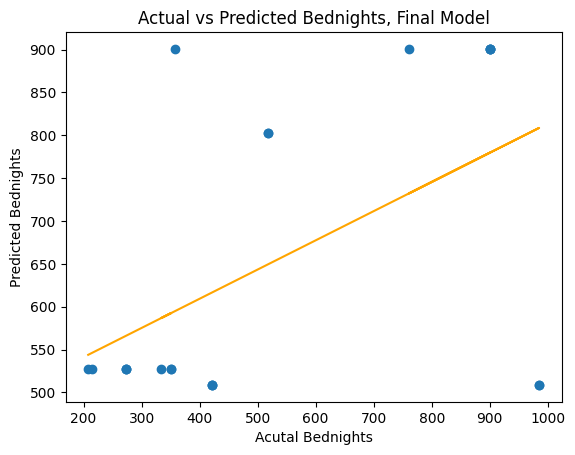

Fold 7 - MSE: 68885.4503, RMSE: 262.4604, R^2: 0.0861


<Figure size 640x480 with 0 Axes>

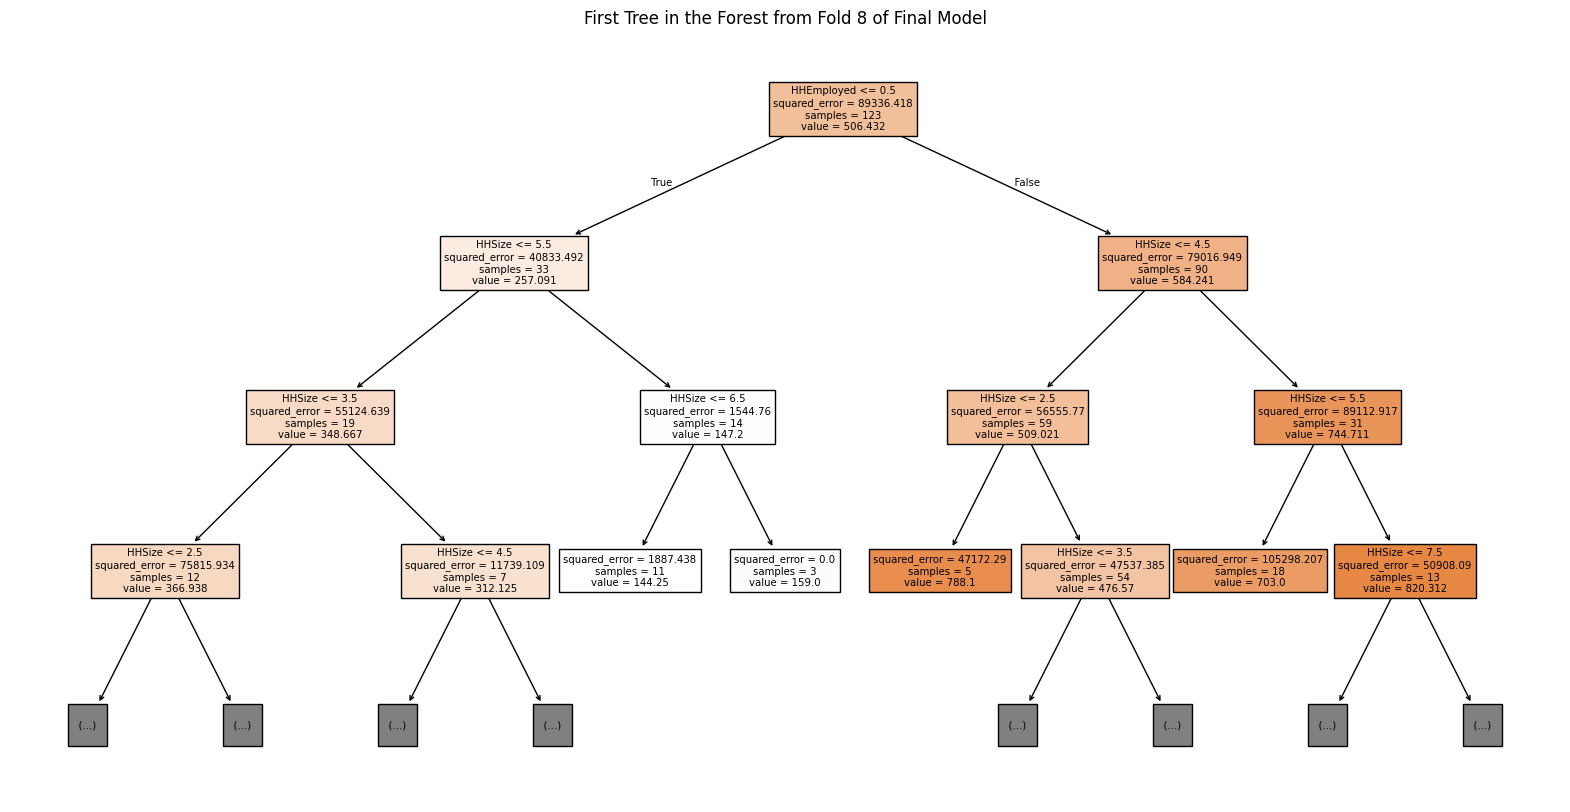

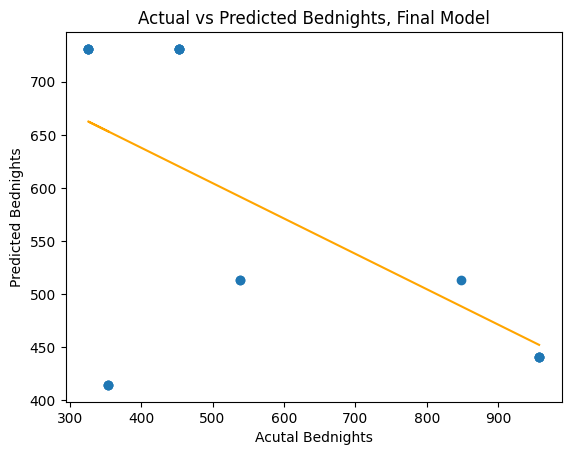

Fold 8 - MSE: 119791.8269, RMSE: 346.1096, R^2: -1.0653


<Figure size 640x480 with 0 Axes>

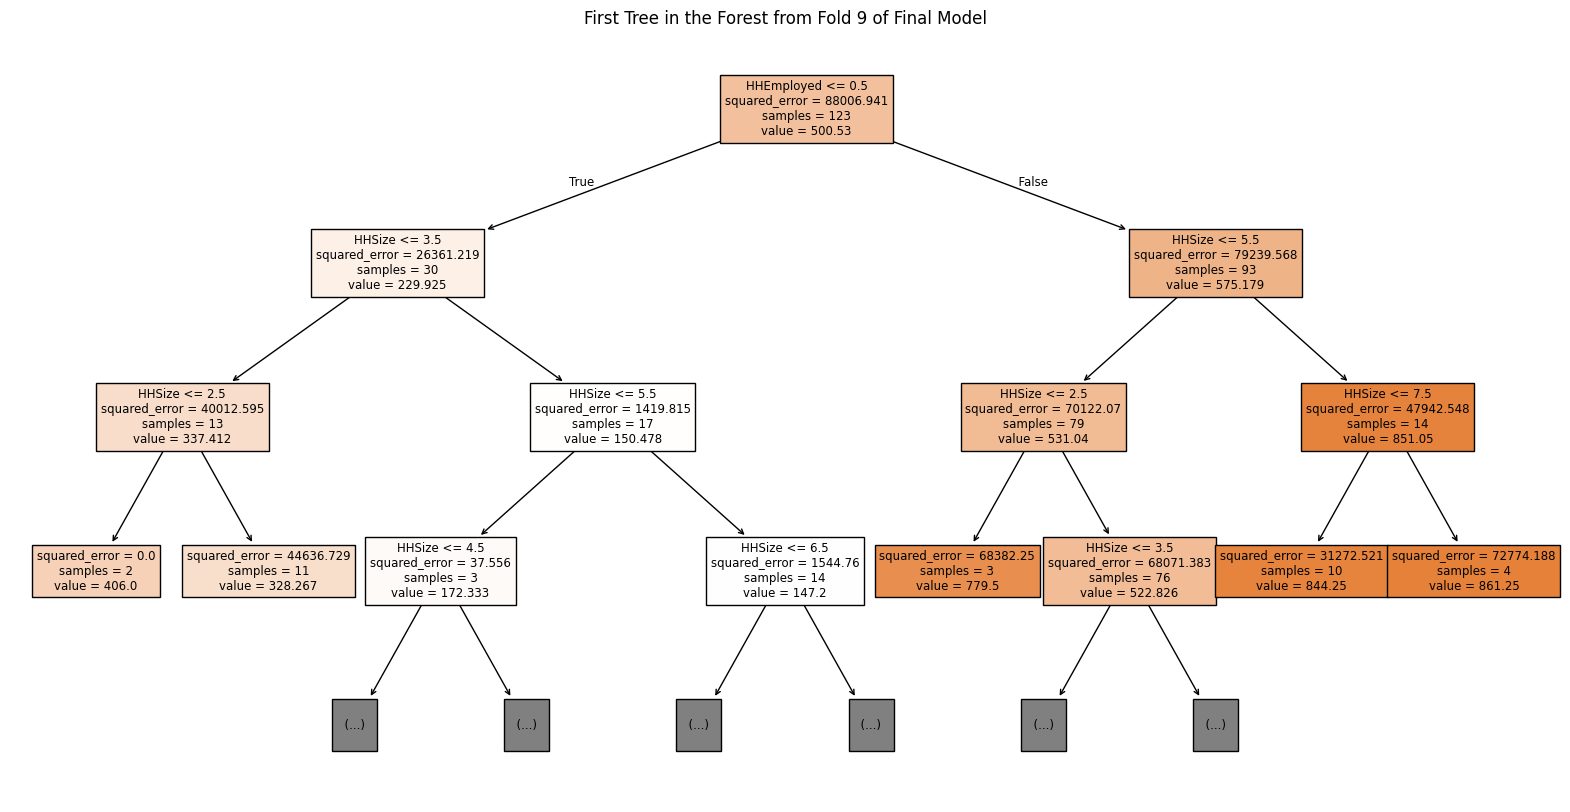

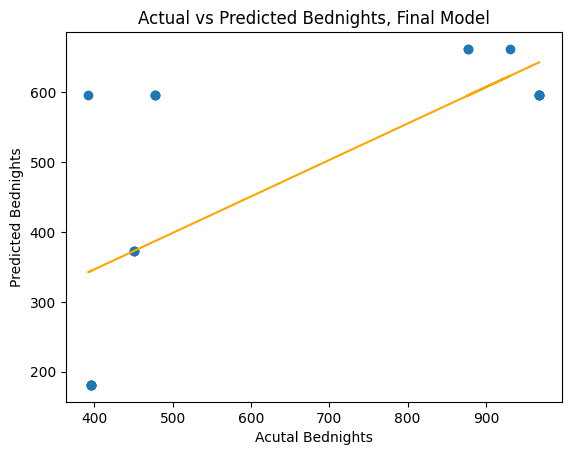

Fold 9 - MSE: 59451.2102, RMSE: 243.8262, R^2: 0.0721


<Figure size 640x480 with 0 Axes>

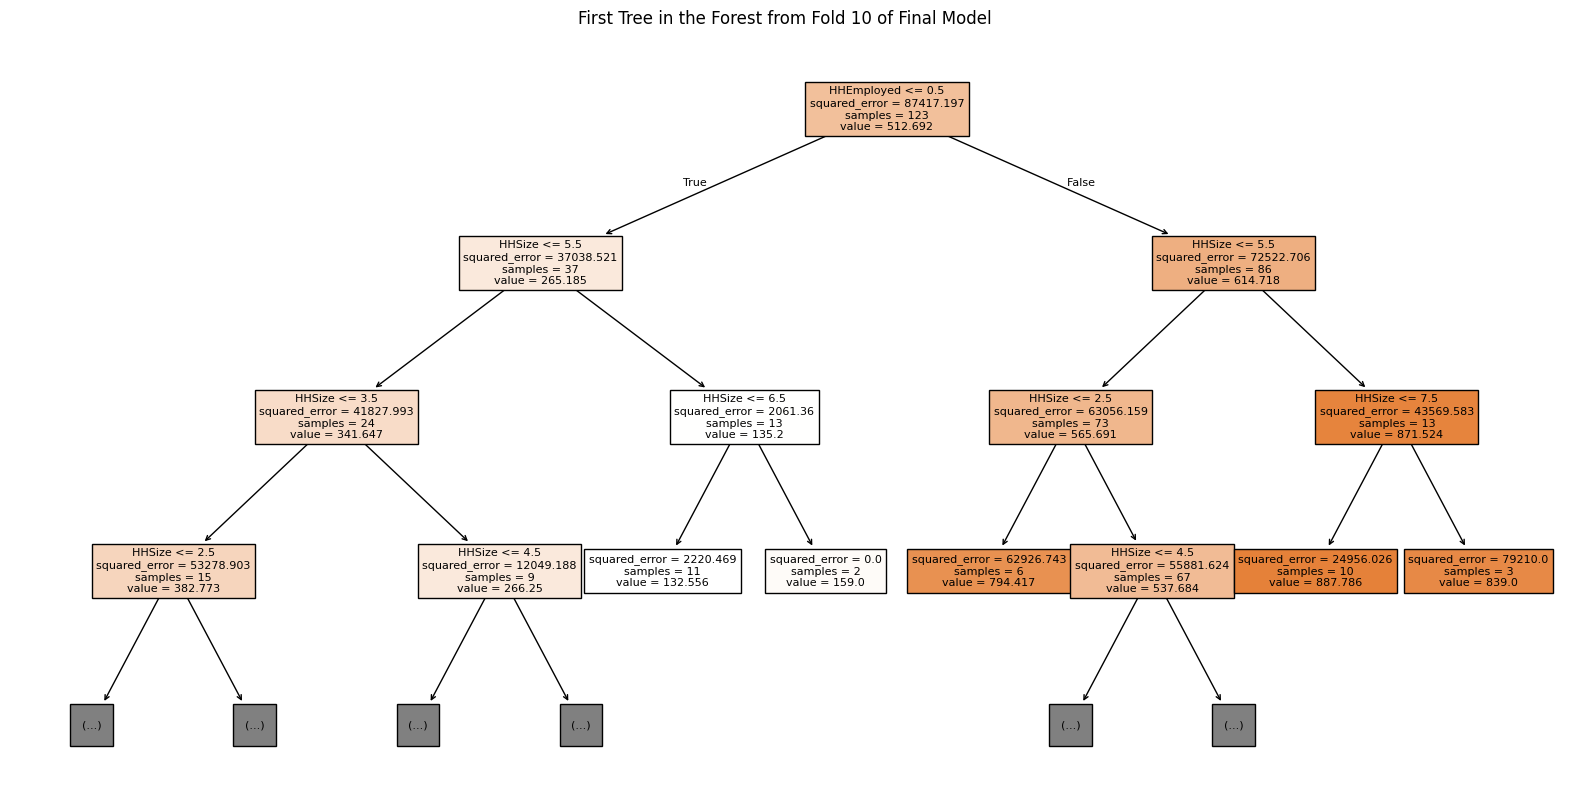

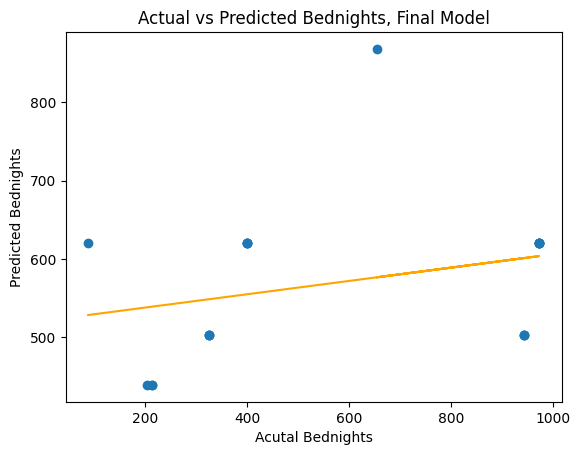

Fold 10 - MSE: 99092.1274, RMSE: 314.7890, R^2: 0.0790


<Figure size 640x480 with 0 Axes>

In [15]:
##Improve Final Model: predict bednights. train final model.
x_best = x[best_features]

for fold, (train_idx, test_idx) in enumerate(gkf.split(x_best, y, groups)):
    x_train, x_test = x_best.iloc[train_idx], x_best.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx] 

    final_model = RandomForestRegressor(random_state = 42)
    final_model.fit(x_train, y_train)

    ##predict bednights
    y_pred = final_model.predict(x_test)
    first_tree = final_model.estimators_[0]
    feature_names = x_best.columns

    ##show tree
    plt.figure(figsize=(20, 10))
    plot_tree(first_tree,
             feature_names=feature_names,
             filled=True,
             rounded=False,
             max_depth=3)
    plt.title(f'First Tree in the Forest from Fold {fold+1} of Final Model')
    plt.show()
    plt.clf()

    ##compare acutal and predicted bednights: fitness.    
    plt.scatter(y_test, y_pred)
    plt.xlabel('Acutal Bednights')
    plt.ylabel('Predicted Bednights')
    plt.title('Actual vs Predicted Bednights, Final Model')
    a, b = np.polyfit(y_test, y_pred, 1)
    plt.plot(y_test, a * y_test + b, color='orange')
    plt.show()
    plt.clf()

    ##Evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Fold {fold+1} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}')

Fianl model including only features with highest importance vastly improves on previous forests and on improved linear regression. Attempt hypertuning next.

Fold 1 best params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


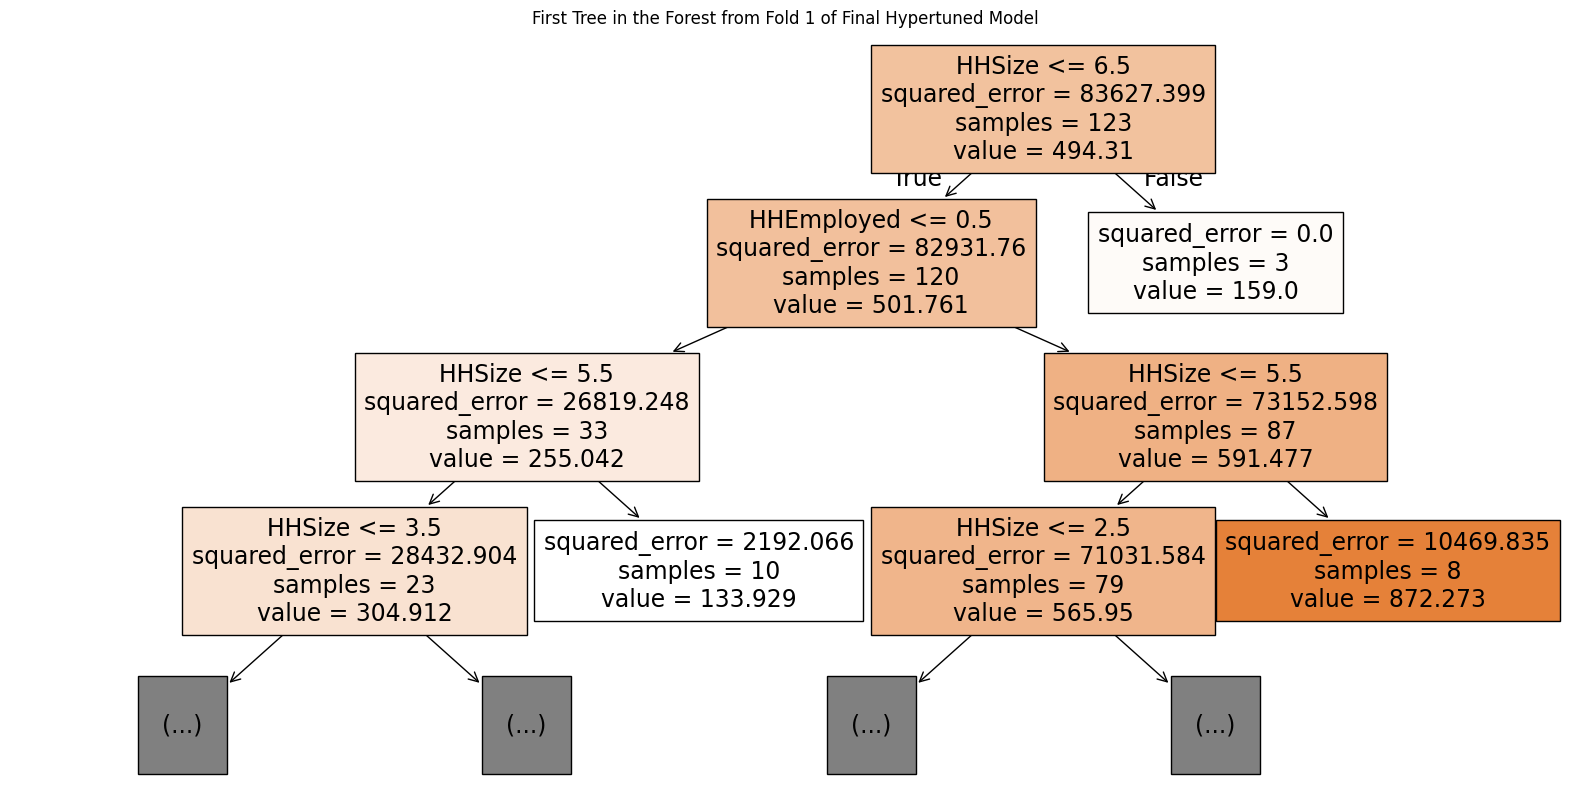

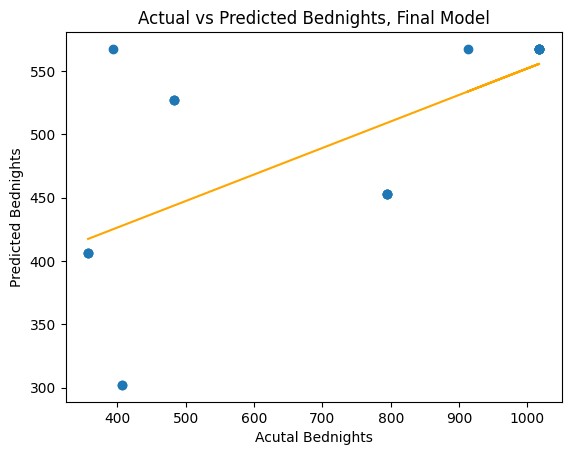

Fold 1 - MSE: 98257.5517, RMSE: 313.4606, R^2: -0.3379
Fold 2 best params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}


<Figure size 640x480 with 0 Axes>

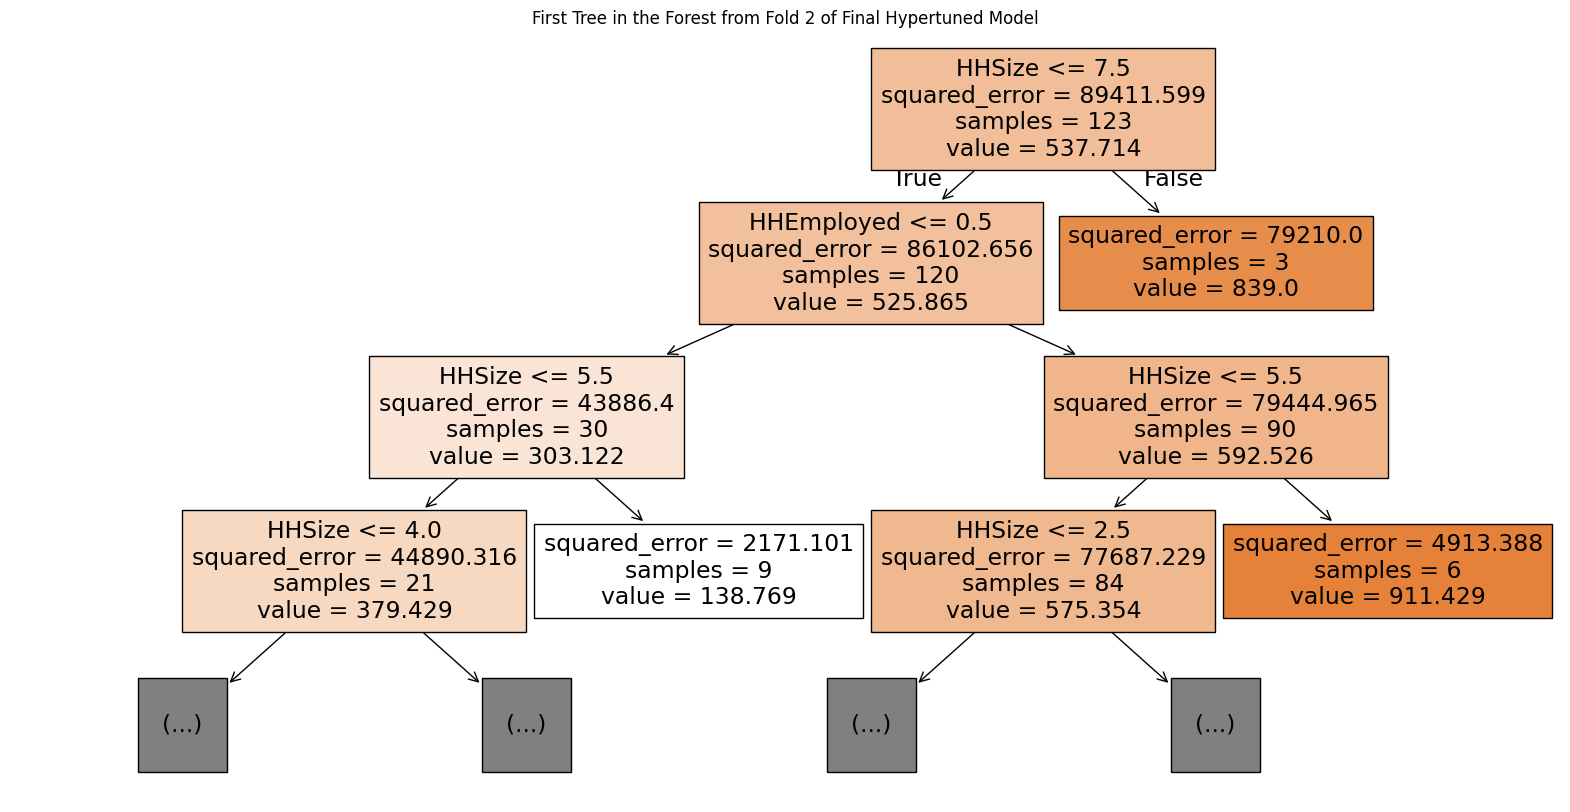

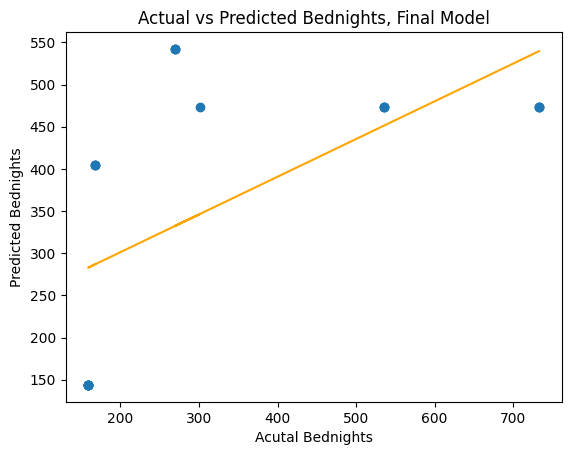

Fold 2 - MSE: 31876.8148, RMSE: 178.5408, R^2: 0.2992
Fold 3 best params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}


<Figure size 640x480 with 0 Axes>

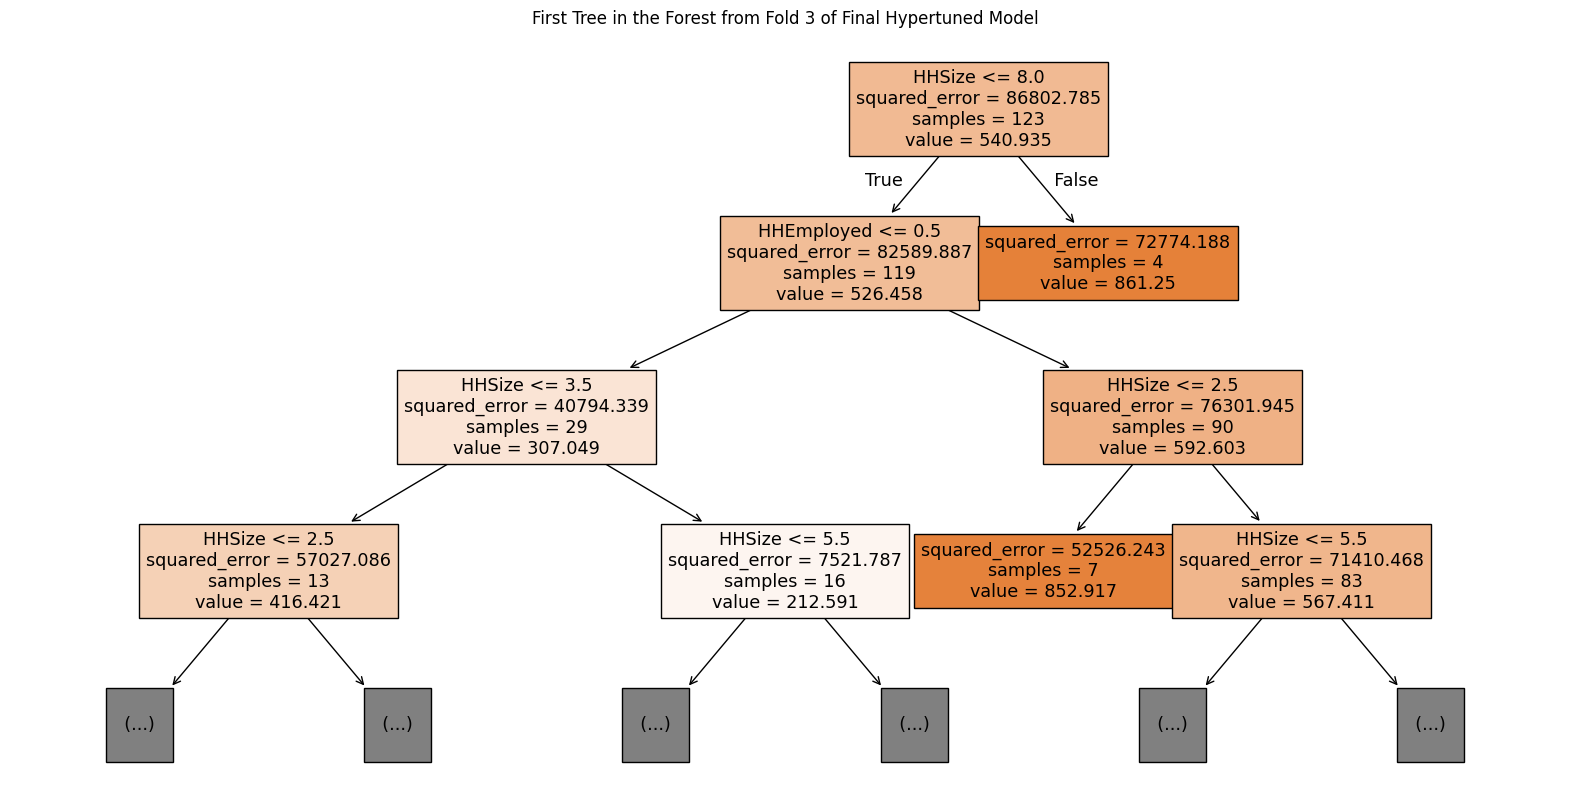

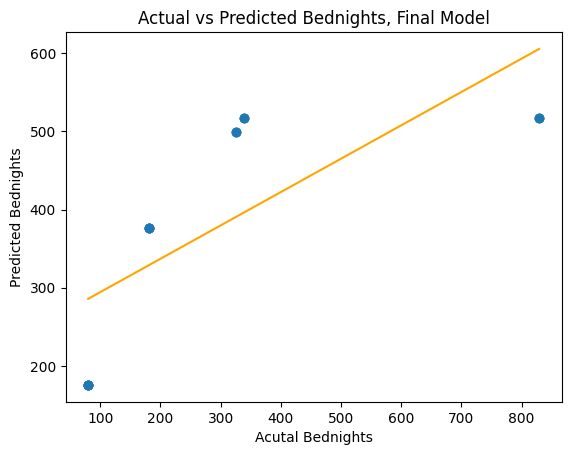

Fold 3 - MSE: 36110.6779, RMSE: 190.0281, R^2: 0.4014
Fold 4 best params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}


<Figure size 640x480 with 0 Axes>

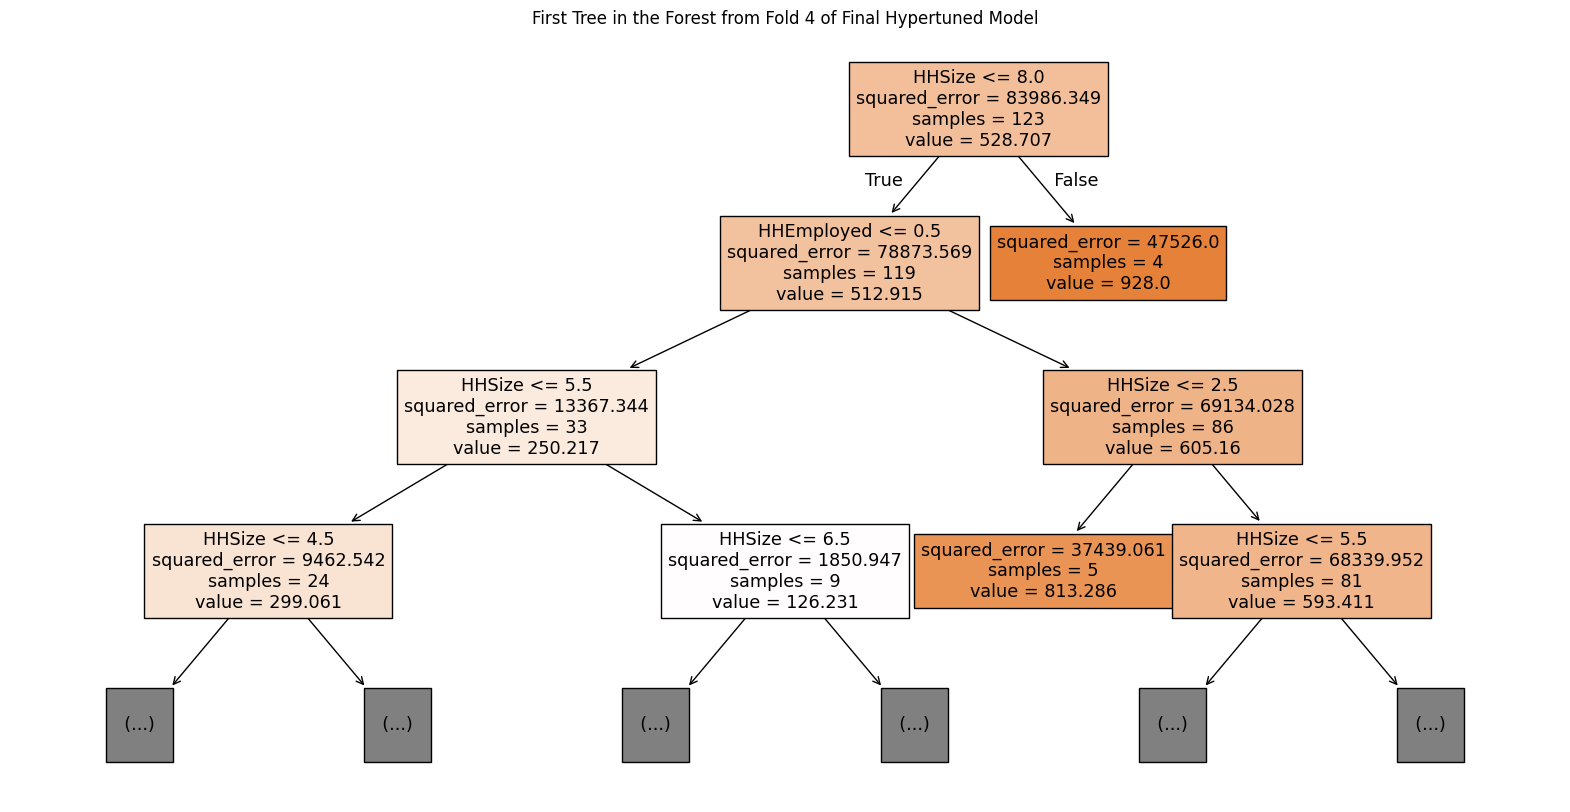

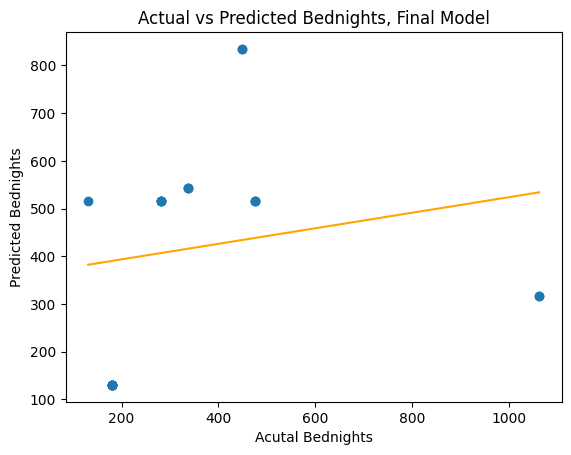

Fold 4 - MSE: 91816.2982, RMSE: 303.0120, R^2: -0.4671
Fold 5 best params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}


<Figure size 640x480 with 0 Axes>

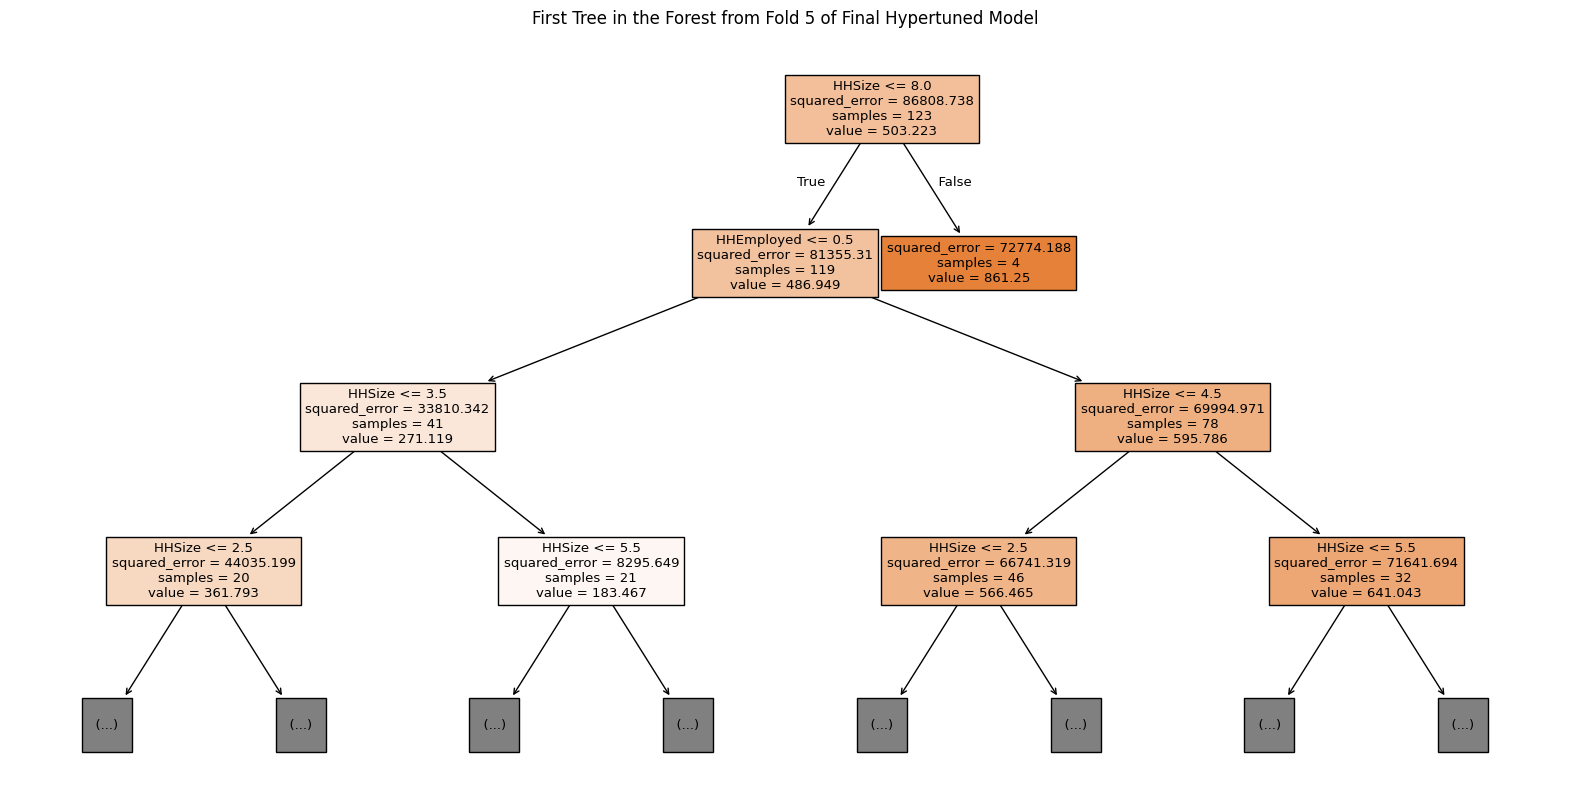

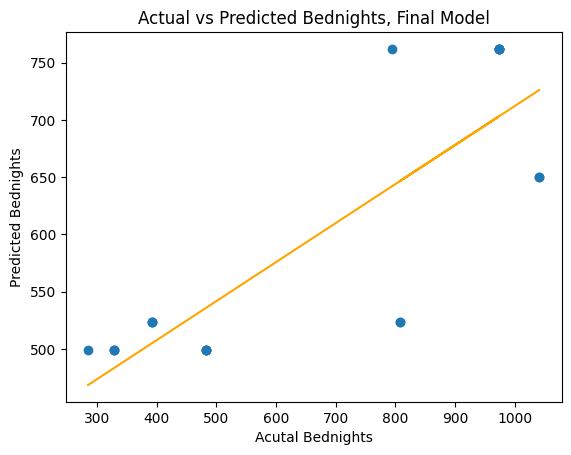

Fold 5 - MSE: 41675.4570, RMSE: 204.1457, R^2: 0.4702
Fold 6 best params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


<Figure size 640x480 with 0 Axes>

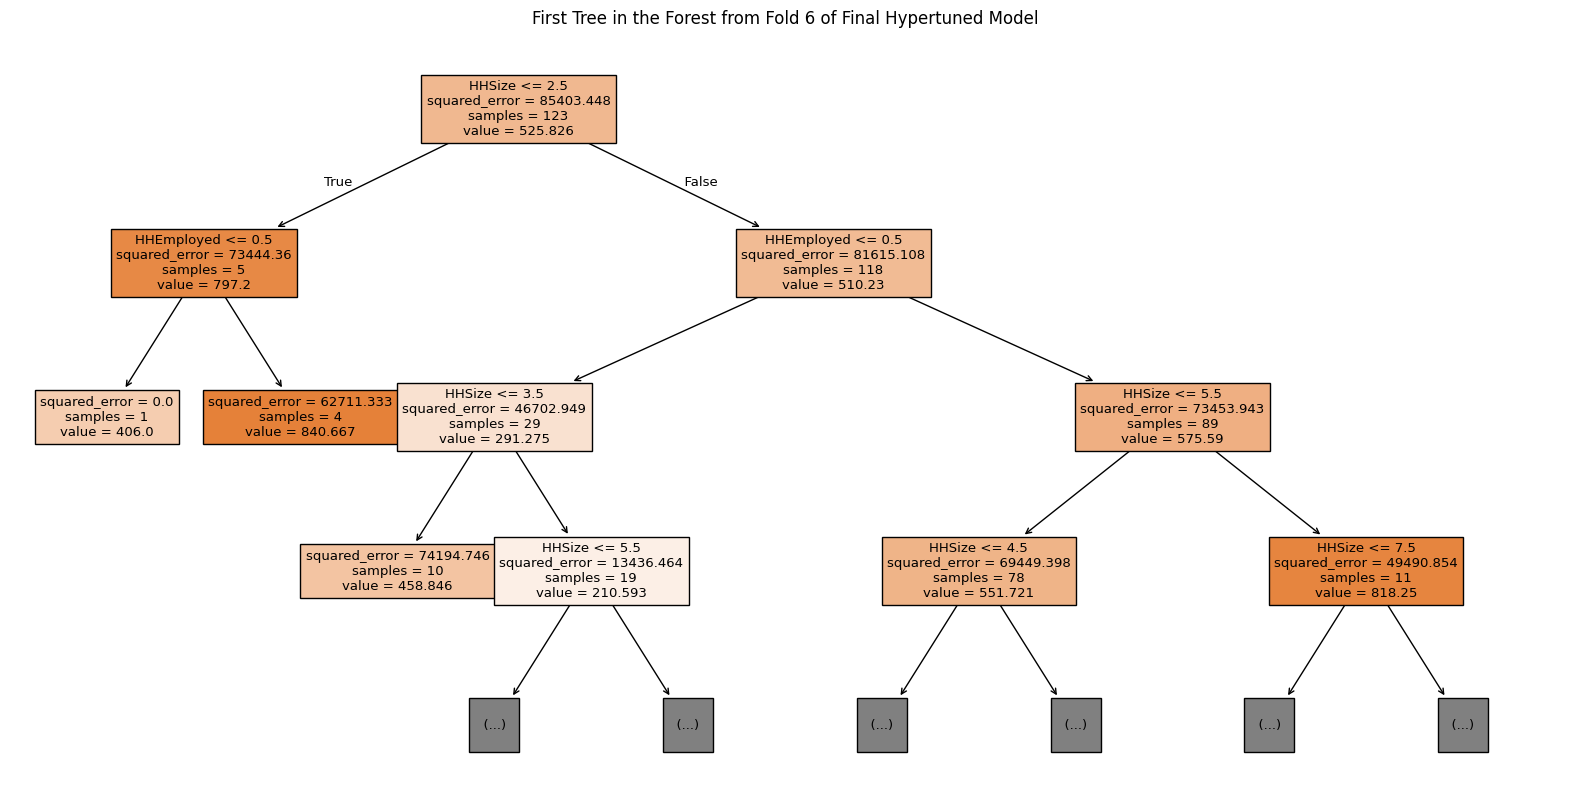

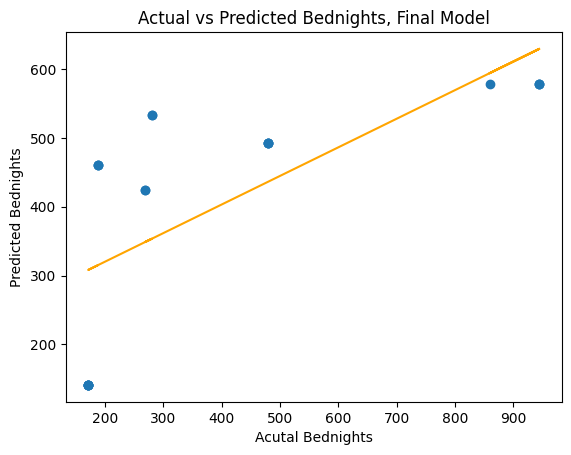

Fold 6 - MSE: 42310.4666, RMSE: 205.6951, R^2: 0.4574
Fold 7 best params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


<Figure size 640x480 with 0 Axes>

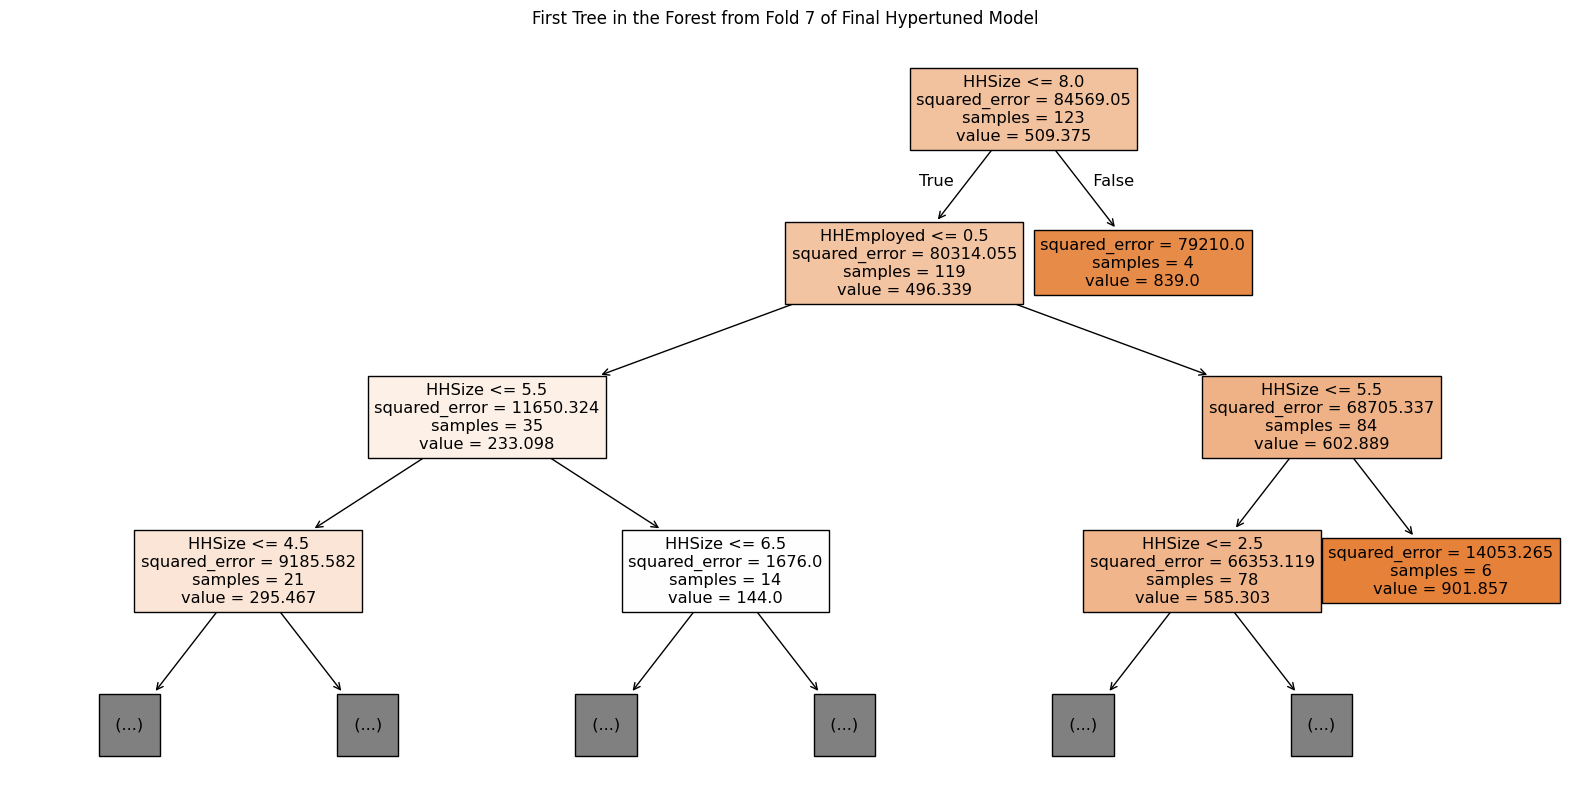

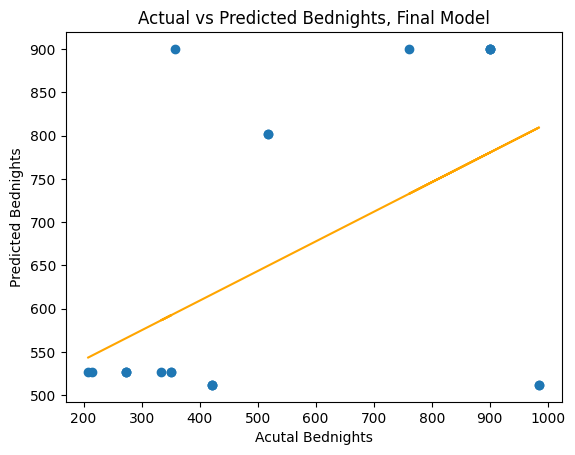

Fold 7 - MSE: 68454.9624, RMSE: 261.6390, R^2: 0.0918
Fold 8 best params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


<Figure size 640x480 with 0 Axes>

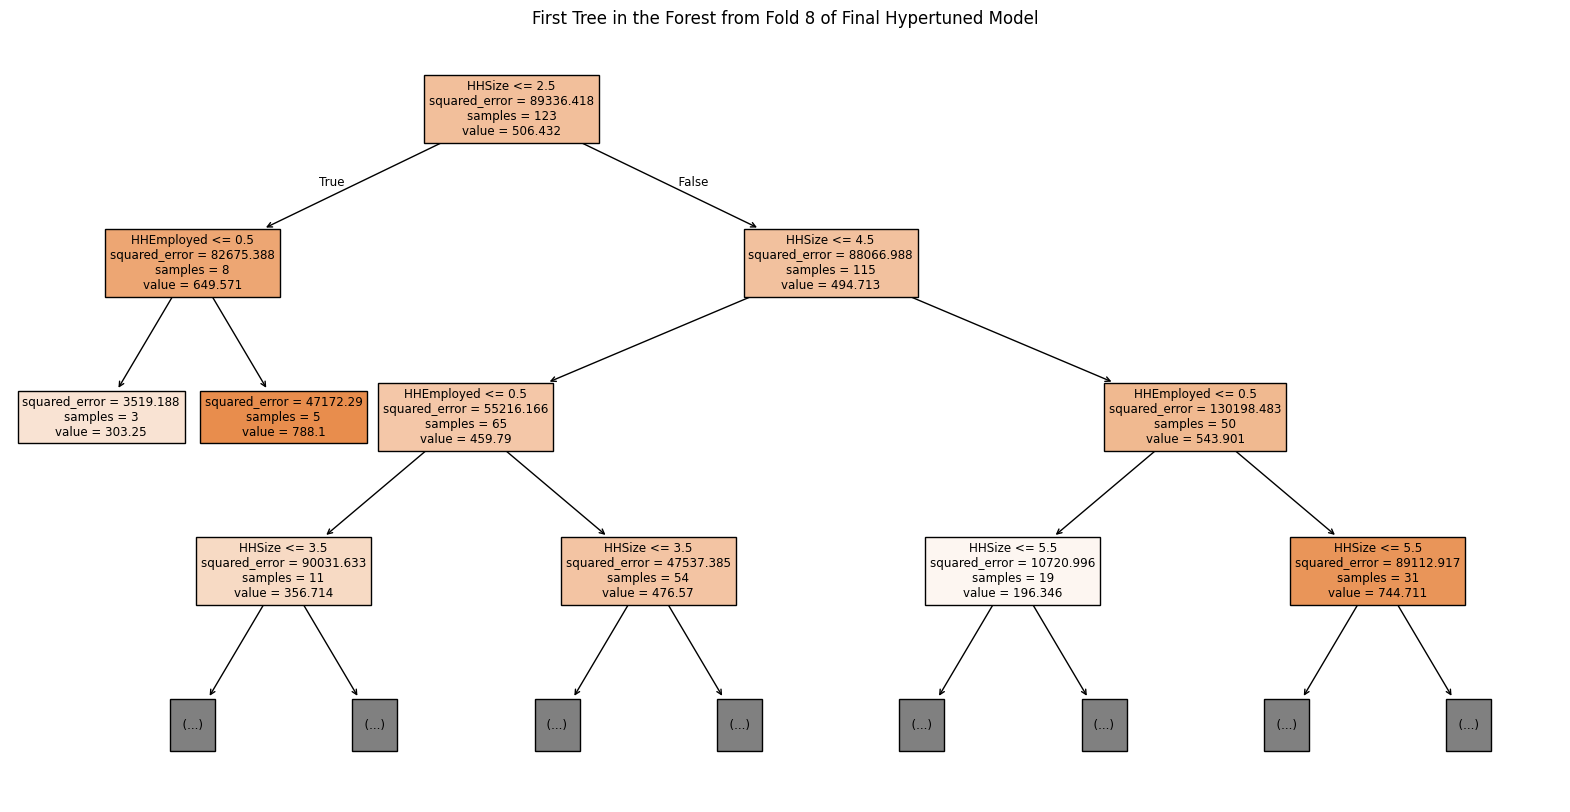

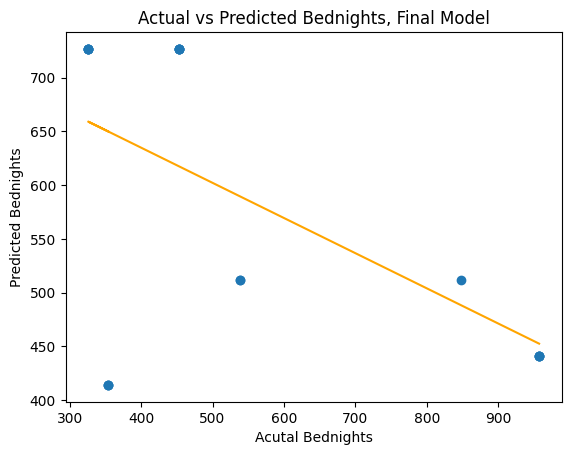

Fold 8 - MSE: 118329.2758, RMSE: 343.9902, R^2: -1.0401
Fold 9 best params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


<Figure size 640x480 with 0 Axes>

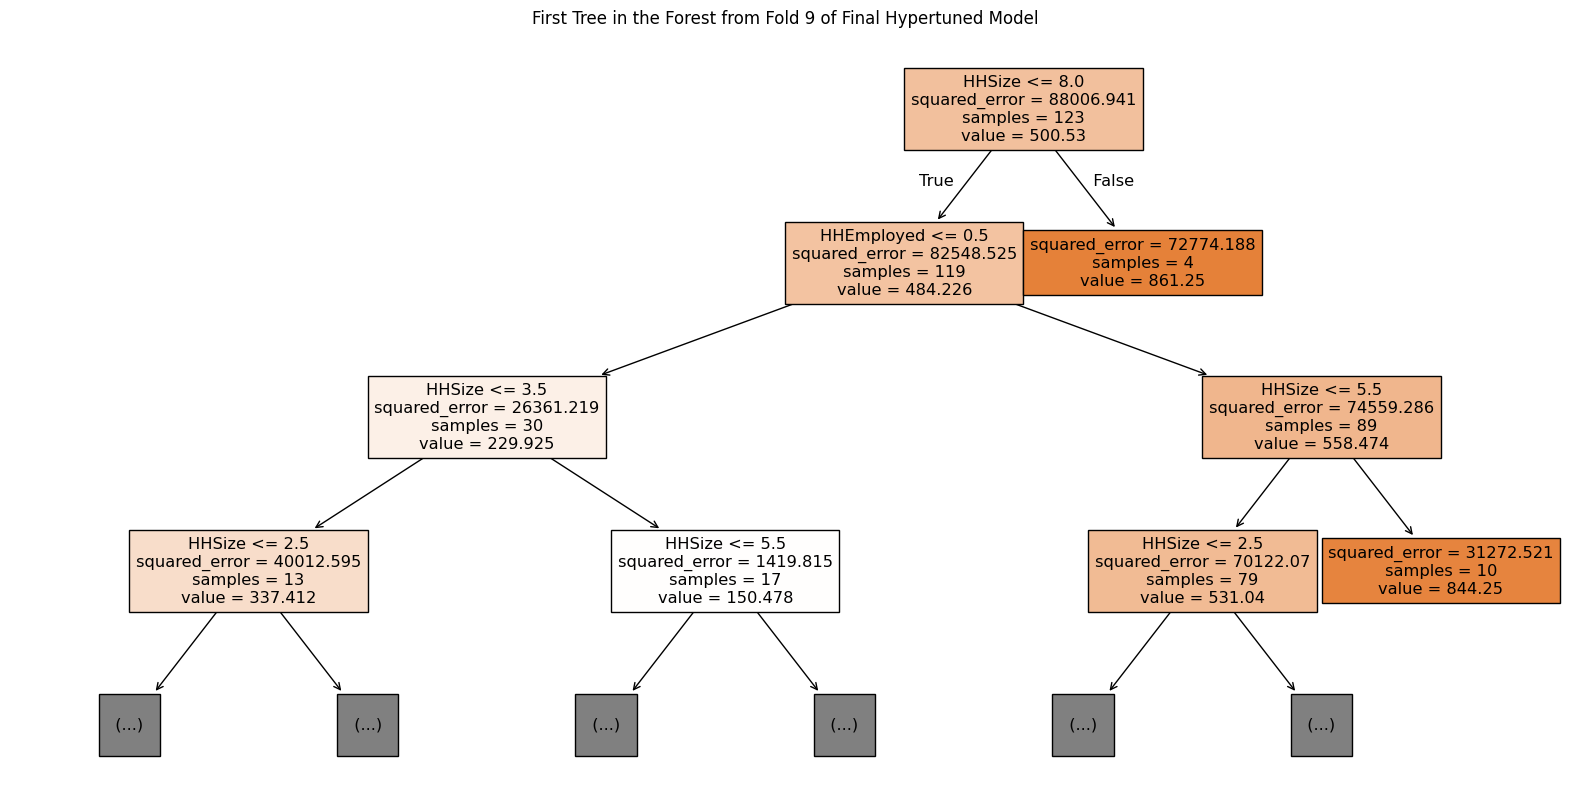

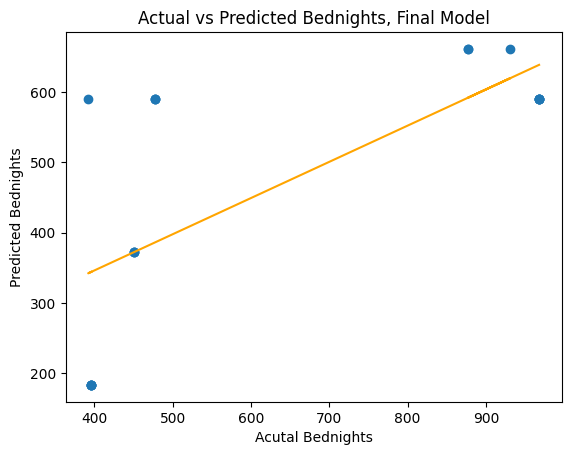

Fold 9 - MSE: 60058.2907, RMSE: 245.0679, R^2: 0.0626
Fold 10 best params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}


<Figure size 640x480 with 0 Axes>

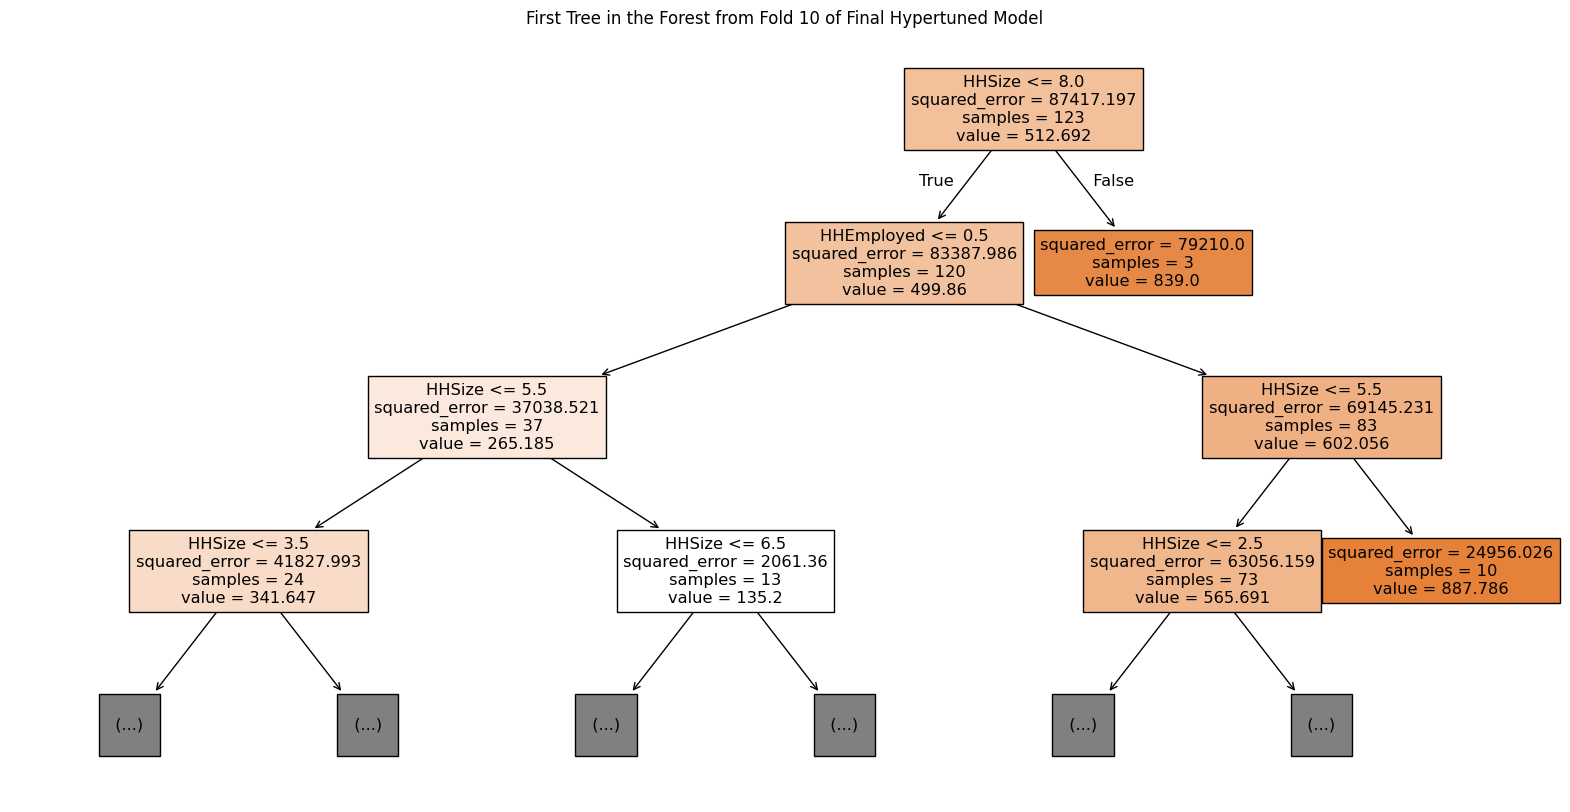

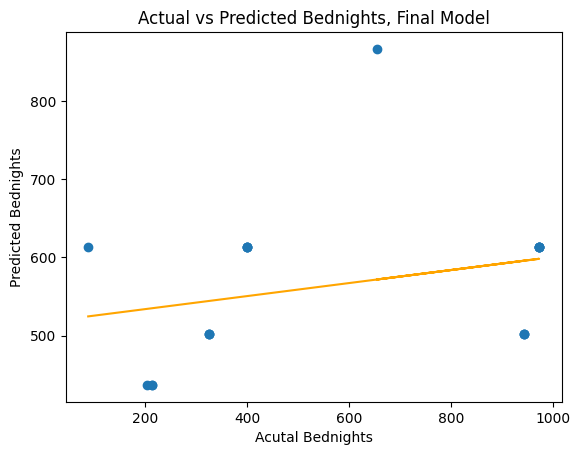

Fold 10 - MSE: 99303.5592, RMSE: 315.1247, R^2: 0.0770


<Figure size 640x480 with 0 Axes>

In [16]:
##Improve Final Model: predict bednights. train final model. hypertune final model.
x_best = x[best_features]

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2,5],
    'max_features': ['sqrt','log2']
}

for fold, (train_idx, test_idx) in enumerate(gkf.split(x_best, y, groups)):
    x_train, x_test = x_best.iloc[train_idx], x_best.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx] 

    grid = GridSearchCV(
        estimator=RandomForestRegressor(random_state=42),
        param_grid=param_grid,
        scoring='r2',
        cv=3,
        n_jobs=-1,
        verbose=0
    )
    grid.fit(x_train, y_train)
    best_model = grid.best_estimator_
    print(f"Fold {fold+1} best params: {grid.best_params_}")

    ##predict bednights
    y_pred = best_model.predict(x_test)
    first_tree = best_model.estimators_[0]
    feature_names = x_best.columns

    ##show tree
    plt.figure(figsize=(20, 10))
    plot_tree(first_tree,
             feature_names=feature_names,
             filled=True,
             rounded=False,
             max_depth=3)
    plt.title(f'First Tree in the Forest from Fold {fold+1} of Final Hypertuned Model')
    plt.show()
    plt.clf()

    ##compare acutal and predicted bednights: fitness.
    plt.scatter(y_test, y_pred)
    a, b = np.polyfit(y_test, y_pred, 1)
    plt.plot(y_test, a * y_test + b, color='orange')
    plt.xlabel('Acutal Bednights')
    plt.ylabel('Predicted Bednights')
    plt.title('Actual vs Predicted Bednights, Final Model')
    plt.show()
    plt.clf()

    ##Evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Fold {fold+1} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}')

Hyptertuning does not improve model.